# Segunda lista - Problema grupal 1

## Componentes del grupo

* Pol Casacuberta Gil
* Joaquin Faraone Prieto
* Agnès Felip i Díaz
* Marta Granero i Martí

## Predicción del uso de bicicletas

### El uso compartido de bicicletas es un servicio proporcionado por cualquier ciudad importante del mundo, por lo que comprender y predecir el comportamiento del sistema es un elemento clave. Vamos a trabajar con el conjunto de datos de bicicletas compartidas del repositorio de conjuntos de datos de UCI que recopila estadísticas agregadas de uso de bicicletas junto con otra información adicional relevante. Se pueden descargar los datos desde aquí [https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

### El objetivo de este problema es predecir cúantas bicicletas se usarán diáriamente (el archivo day.csv). Podéis leer en el $\texttt{Readme.txt}$ los detalles sobre las variables

### Procedamos con los ejercicios que se nos piden

#### a) El primer paso es preprocesar y preparar los datos antes de ajustar cualquier modelo. Hay algunas variables que no són útiles para el problema o que no tiene sentido usar. Eliminad-las del conjunto de datos. Dividid los datos en conjuntos de entrenamiento y test $(60\%/40\%)$. Haced una exploración mínima del conjunto de datos de entrenamiento observando las relaciones entre las variables, especialmente con la variable objetivo. Describid las cosas que hayáis visto que os parezcan interesantes. Estandarizad las variables(calculad el estandarizador a partir de los datos del entrenamiento y luego aplicadlo a los datos de test).

In [116]:
# Descomentar para actualizar librerias
# Si se actualiza alguna libreria hay que reiniciar el notebook
# !pip install pandas --upgrade --user --quiet
# !pip install numpy --upgrade --user --quiet
# !pip install scipy --upgrade --user --quiet
# !pip install statsmodels --upgrade --user --quiet
# !pip install scikit-learn --upgrade --user --quiet
# !pip install plotly --upgrade --user --quiet
# !pip install apafib --upgrade --user --quiet

#### Imports varios

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from pandas.plotting import scatter_matrix

from sklearn import datasets
from sklearn import set_config
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import PoissonRegressor

from sklearn.manifold import TSNE

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from statsmodels.genmod.generalized_linear_model import GLM

from yellowbrick.regressor import AlphaSelection
from yellowbrick.target.feature_correlation import feature_correlation

from scipy import stats

#### Cargamos el conjunto de datos

In [118]:
bicicletas_data = pd.read_csv("./Bike-Sharing-Dataset/day.csv", header=0, delimiter=',')

bicicletas_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Breve información sobre las features del conjunto de datos

In [119]:
bicicletas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Breve estadística descriptiva sobre el conjunto de datos

In [120]:
bicicletas_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


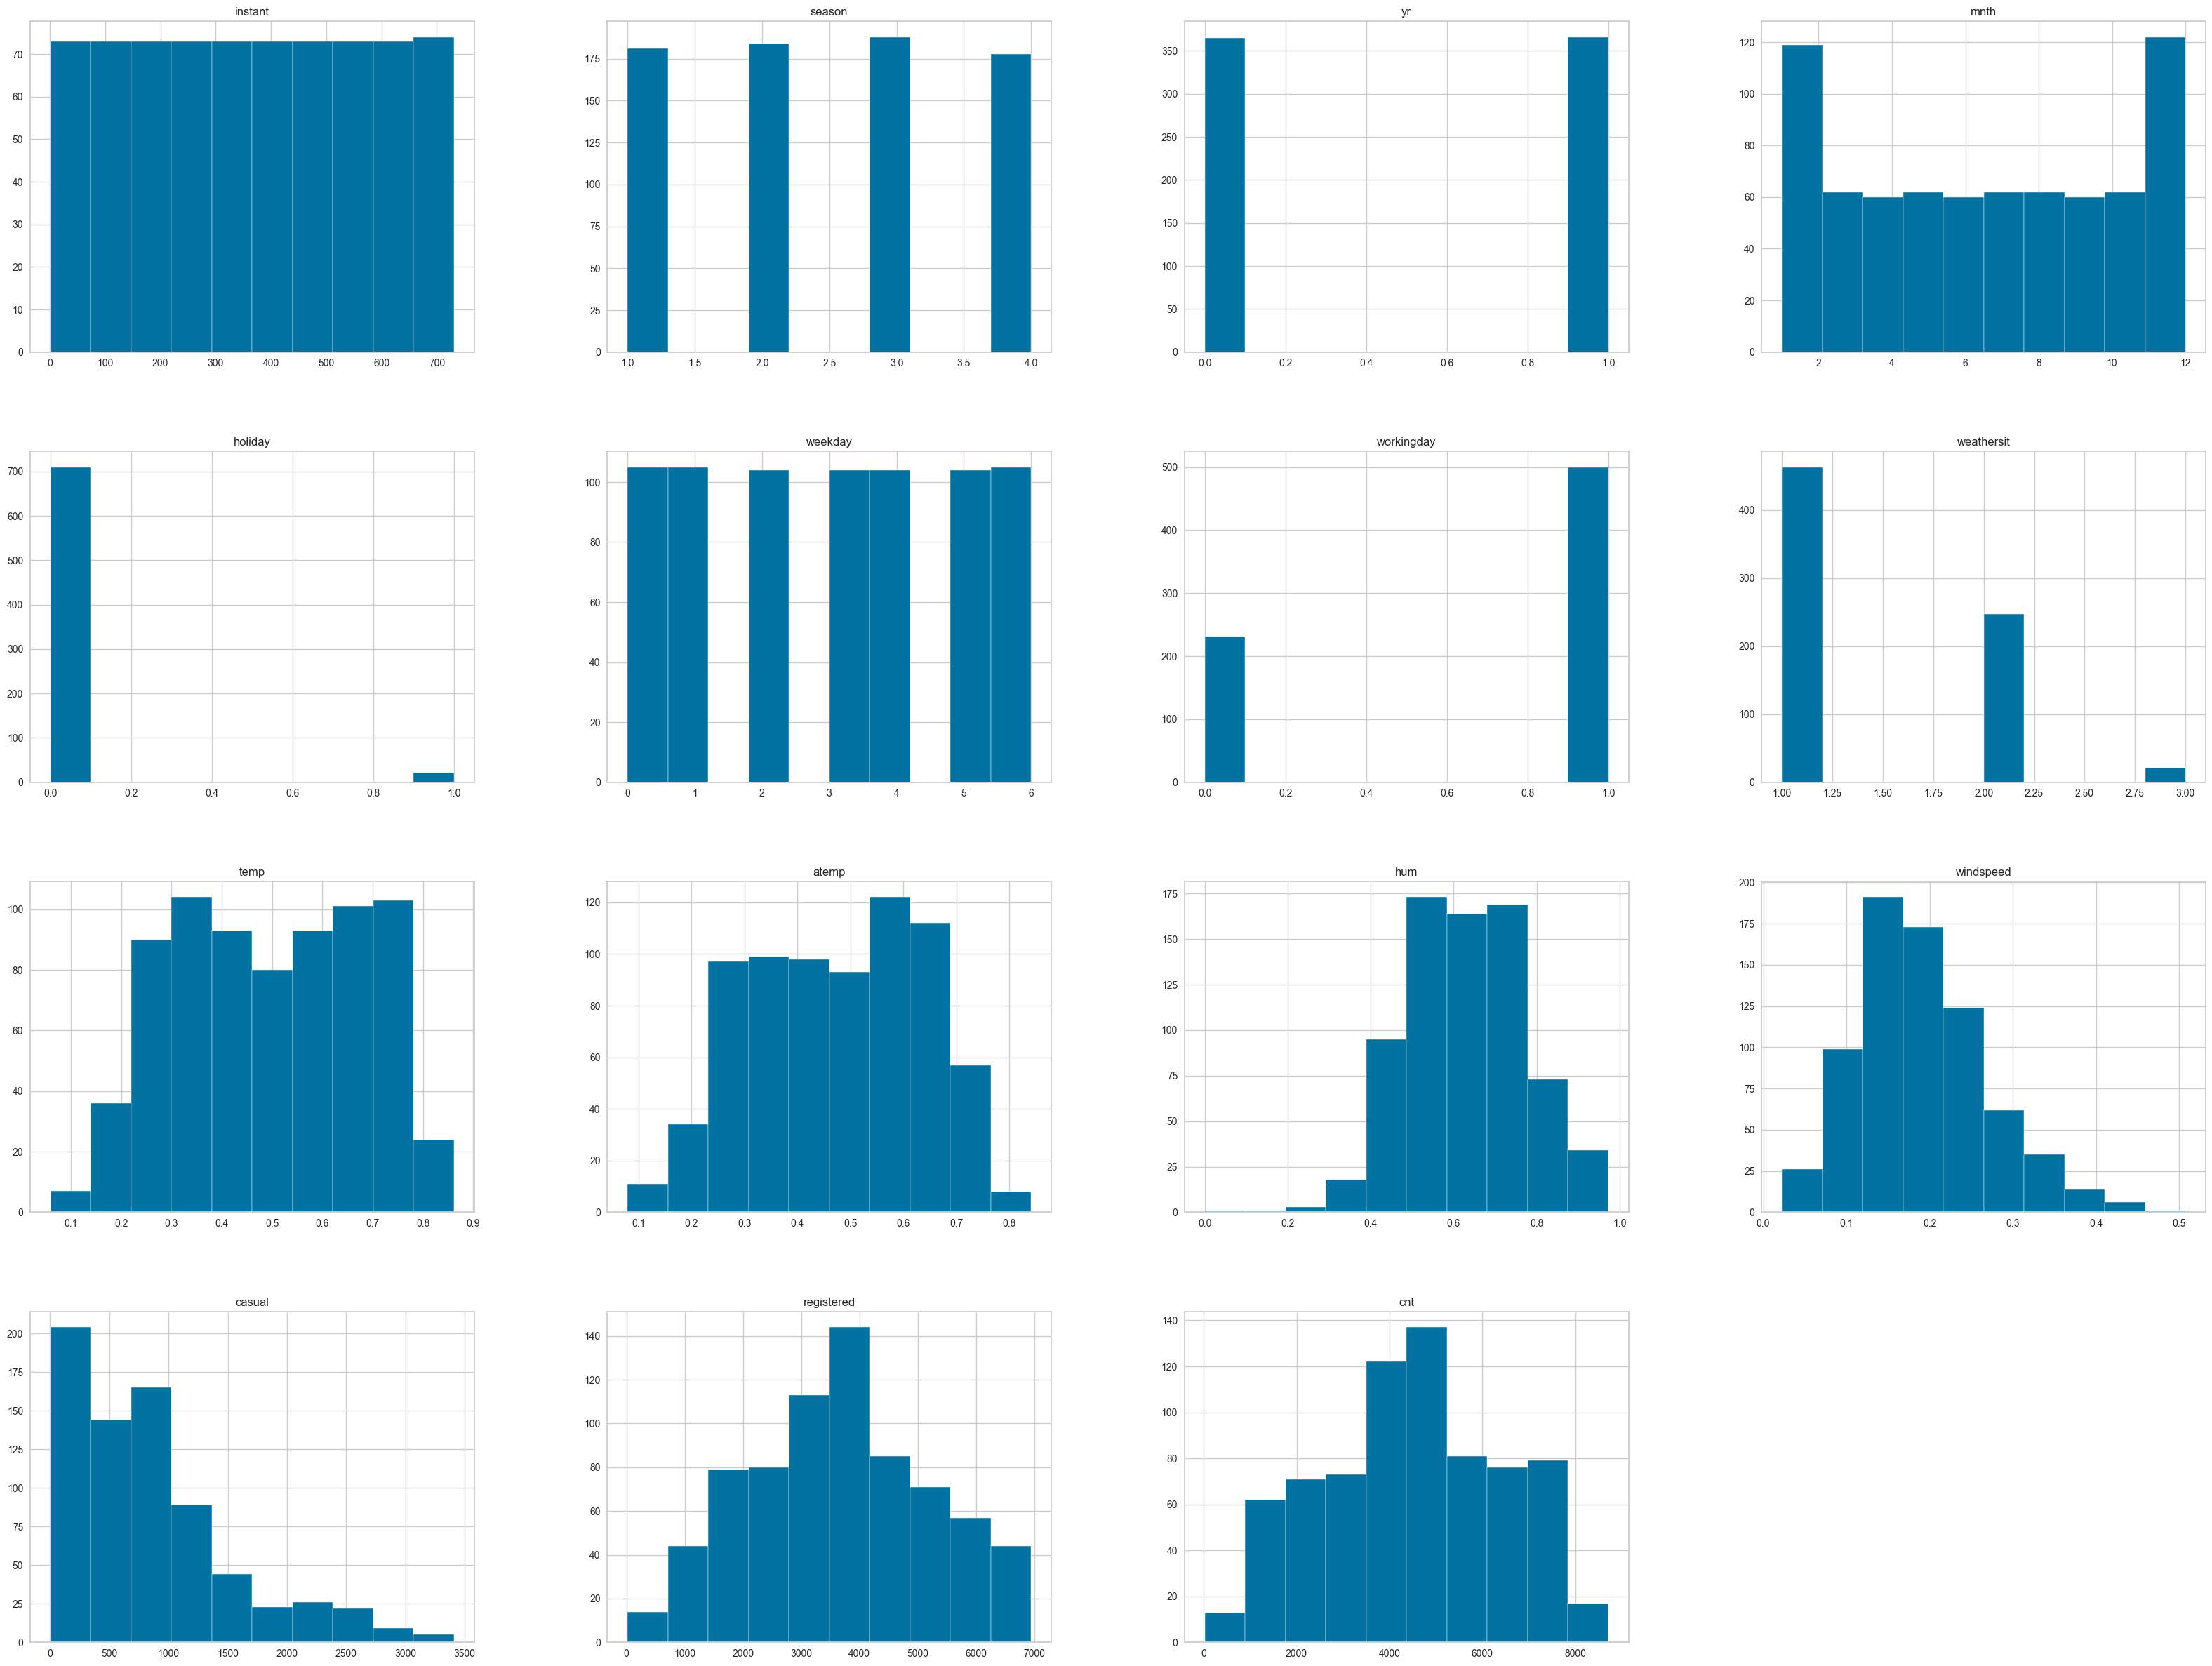

In [121]:
bicicletas_data.hist(figsize=(40,30));

#### Preprocesamiento y preparación de los datos antes de ajustar el modelo.

###### Eliminamos del conjunto de datos las variables que no són útiles para el problema o que no tiene sentido usar

Vemos que en el conjunto de datos no tenemos como ya hemos visto, datos faltantes, pero si que contamos con datos inecesarios. Procedamos a eliminar las variables innecesarias:

- Vemos que tenemos la variable **instant** que simplemente es un identificador
- También tenemos la variable **dteday** que no nos es relevante ya que podemos obtener su información a partir de otras del dataset
- También vemos que la suma de las variables de **casual** i **registered** nos da el conteo de bicicletas que justamente queremos predecir.
- Asimismo podemos eliminar la variable **workingday** ya que podemos extraer su información de las variables de **holiday** y **weekday** (Hemos probado de ejectuar el modelo teniendo en cuenta esta variable y únicamente varia ligeramente para Poison pasando de una $R^{2}$ de 0.824 a 0.818)

In [122]:
bicicletas_data.drop(columns=['instant' , 'dteday', 'casual', 'registered', 'workingday'], inplace=True)

In [123]:
bicicletas_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896
hum,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500
windspeed,731.0,0.190486,0.077498,0.022392,0.134950,0.180975,0.233214,0.507463


#### Con los histogramas podemos ver cierto comportamiento categórico en algunas variables del dataset

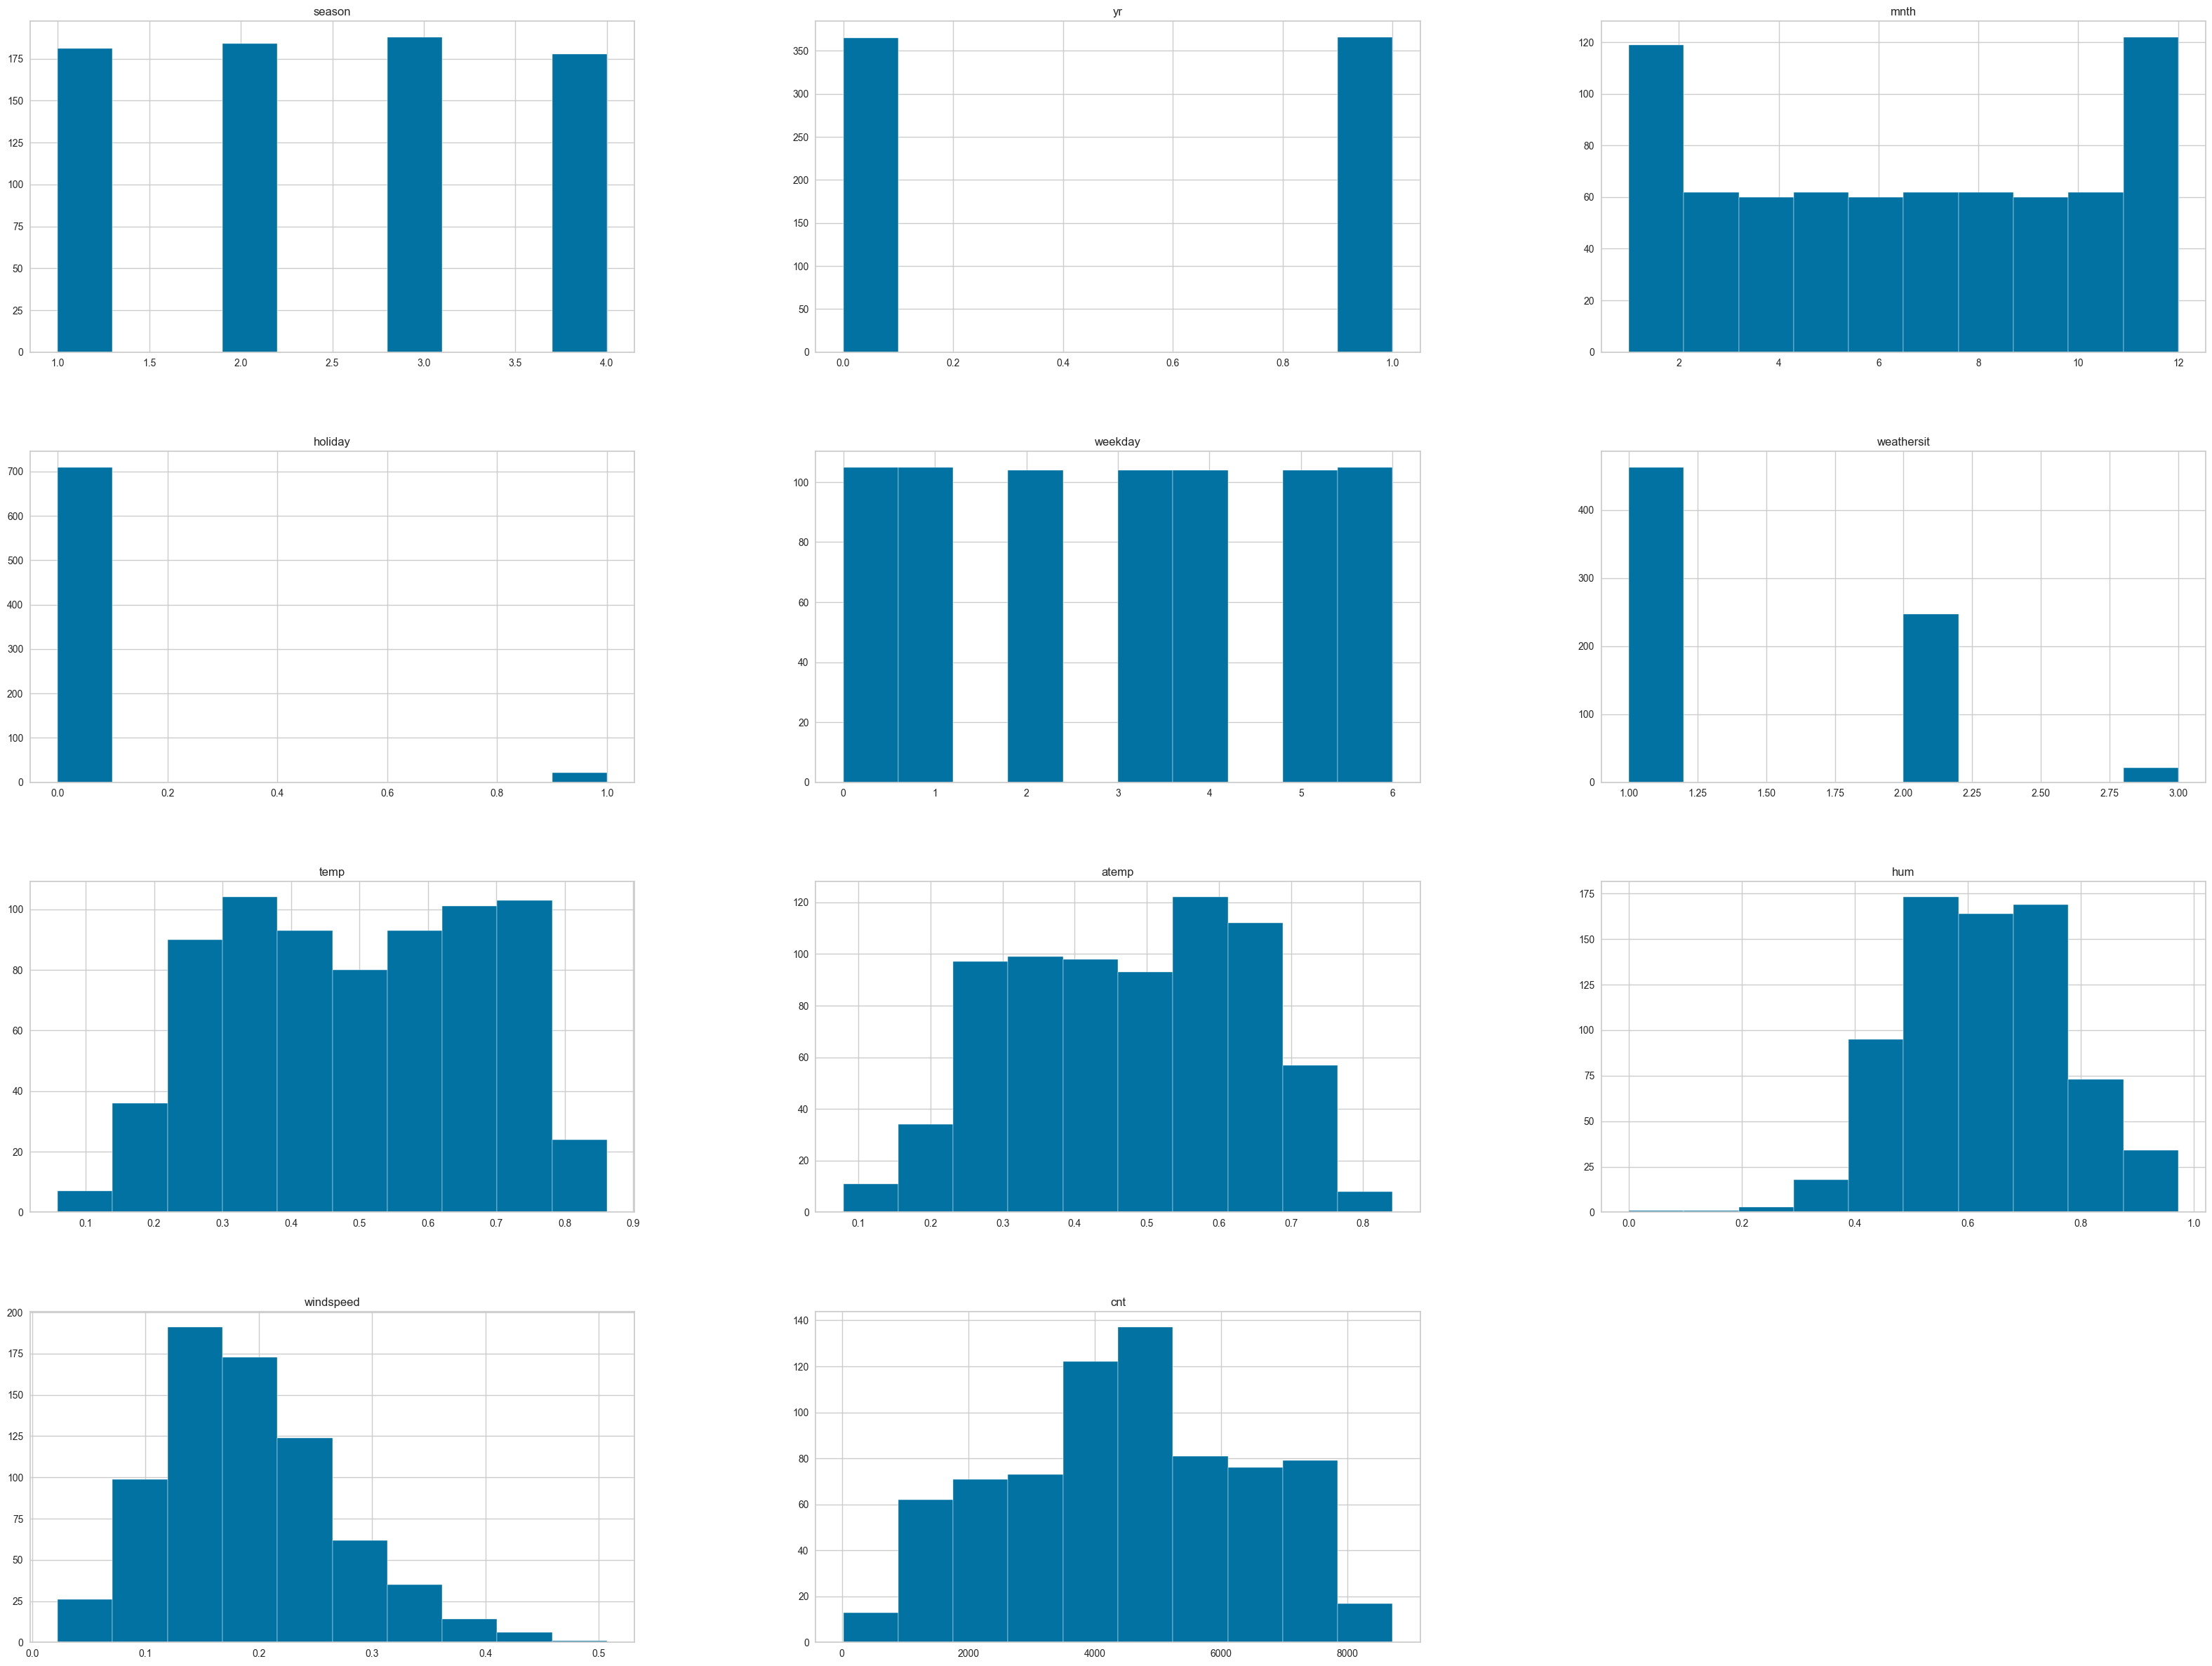

In [124]:
bicicletas_data.hist(figsize=(40,30));

##### Correlación entre las variables predictoras

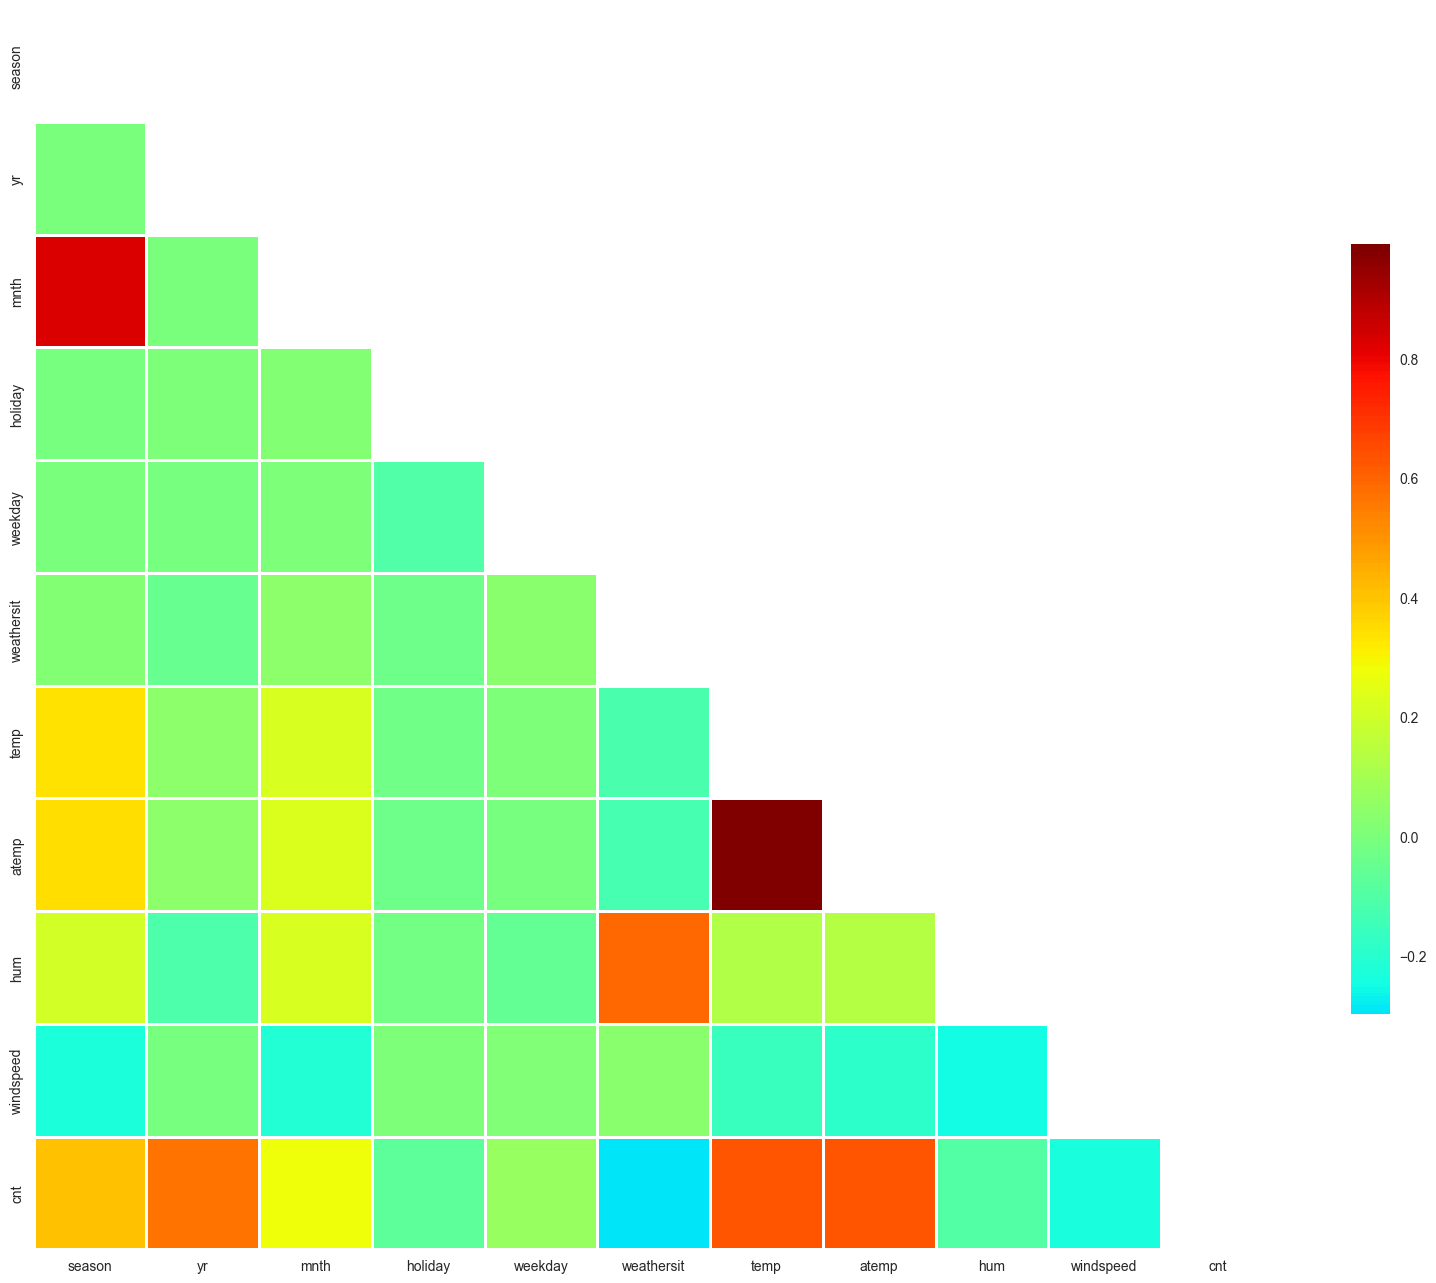

In [125]:
corr = bicicletas_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='jet',  center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5});

##### Vemos que entre distintintas variables numéricas, estas toman valores categóricos, es por este motivo que aplicamos one-hot encoding para las variables que toman estos valores discretos en cada rango

In [126]:
bicicletas_data = pd.get_dummies(bicicletas_data, columns = ['yr','mnth','season','holiday','weekday','weathersit'], drop_first=False)

##### Correlación entre las distintas variables predictoras una vez aplicado el one-hot encoding

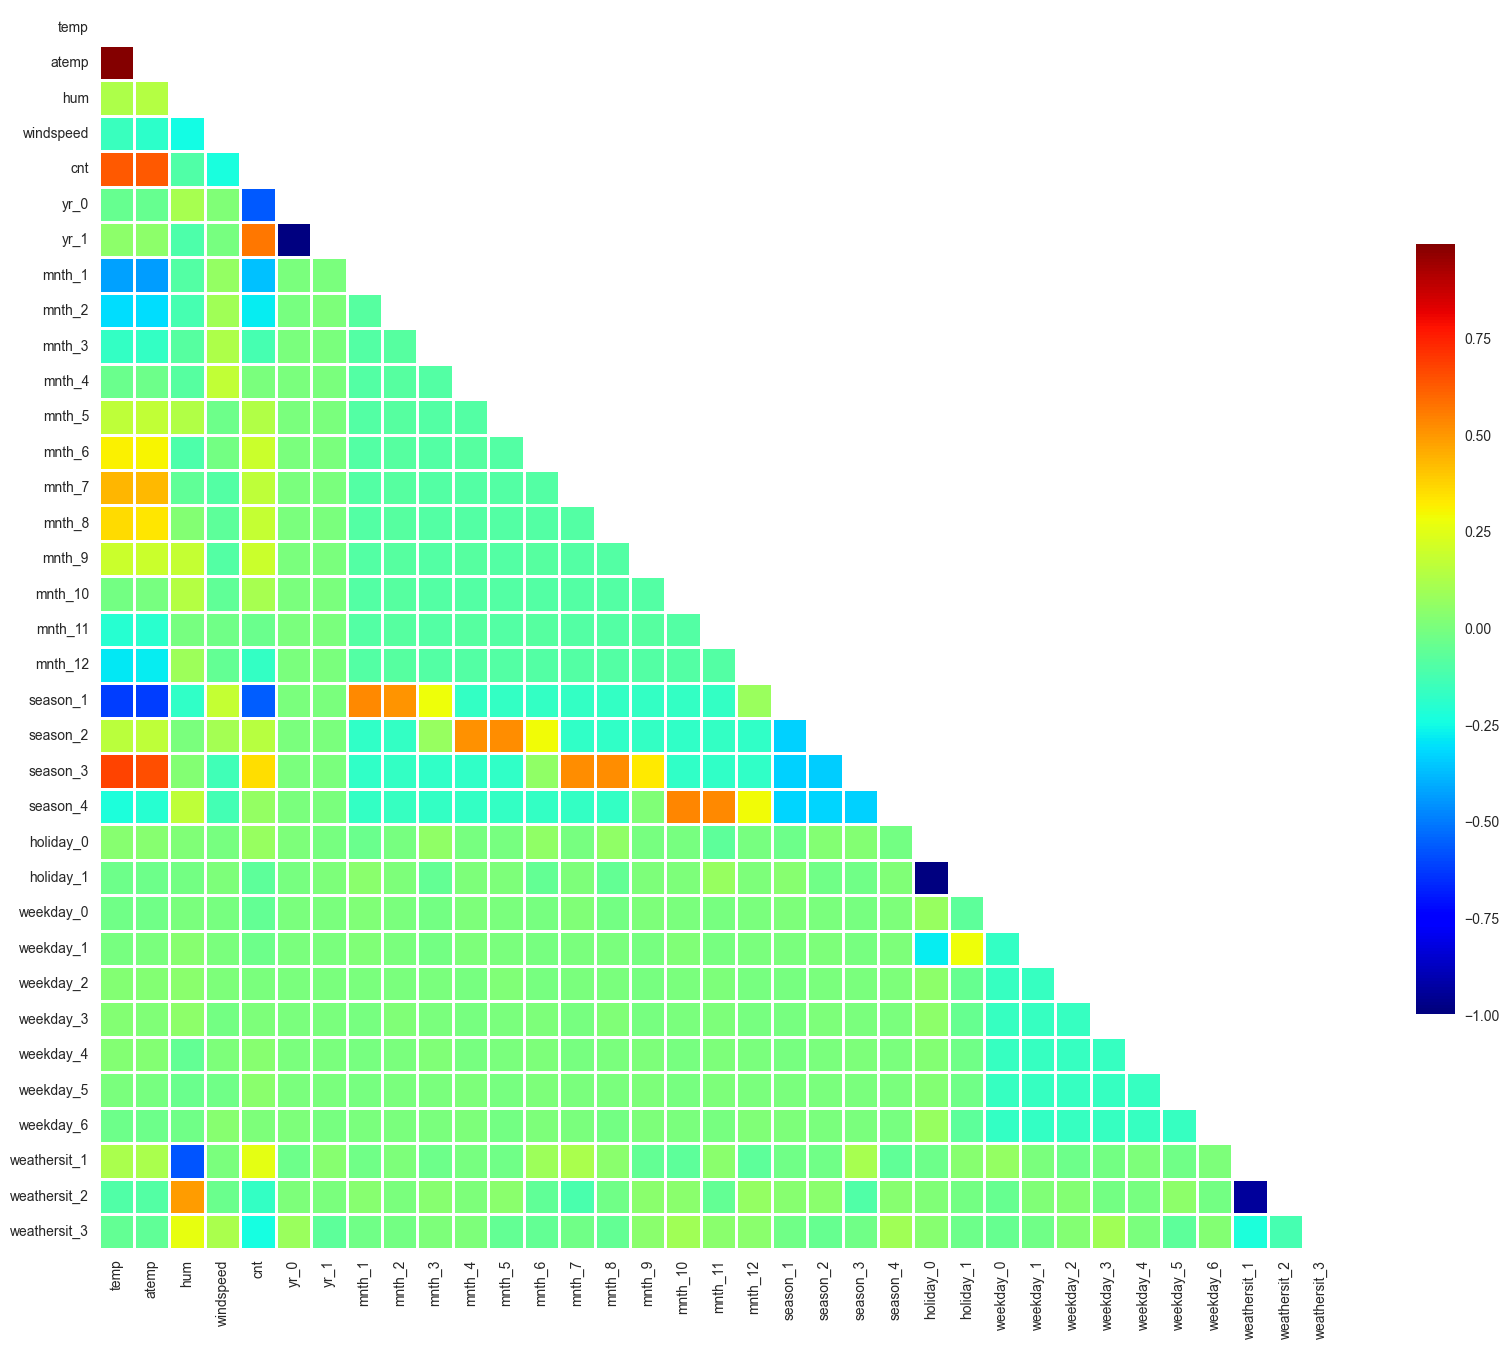

In [127]:
corr = bicicletas_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='jet',  center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5});

Podemos ver que algunas variables muestran cierta relación con otras. Por ejemplo **atemp** y **temp**, con las variables **month** y **season**. 

A su vez **temp** y **atemp** muestan un relación lineal fuerte entre ellas como es de esperar, así como también entre las variables **month** y **season**. Notamos que podemas observar en forma de relación lineal positiva que un mes forma está en una época del año. Y la correspondencia de qué época correponde por cada mes del año.

También vemos un comportamiento tendencioso de **cnt** frente a las variables **season** y **month**. Ya que dependiendo de qué mes del año sea, en este caso si se trat de un mes calurosa el conteo de ciclistas será superior.

##### Dividimos el conjunto de datos en entrenamiento y test

In [128]:
X = bicicletas_data.loc[:,bicicletas_data.columns != 'cnt']
y = bicicletas_data['cnt']

##### Transformamos las variables numéricas adecuadamente en un mismo rango para poder ajustar el modelo

In [129]:
 def scaling_preprocessing(X, y, scaler=None):
    print('Tamaño:{}'.format(X.shape))
    categorical_columns = X.dtypes[X.dtypes == 'object'].index.values
    
    # Escalamos las variables numericas
    numerical_columns = [c for c in X.columns if c not in categorical_columns]
    if scaler is None: 
        # Generamos el scaler cuando los datos son los de entrenamiento
        scaler = MinMaxScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    else: 
        X[numerical_columns] = scaler.transform(X[numerical_columns])
    return X, y, scaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train, y_train, scaler = scaling_preprocessing(X_train,y_train)
X_test, y_test, _ = scaling_preprocessing(X_test,y_test,scaler)

Tamaño:(438, 34)
Tamaño:(293, 34)


##### Relación de la variable objetivo con todas las variables predictoras

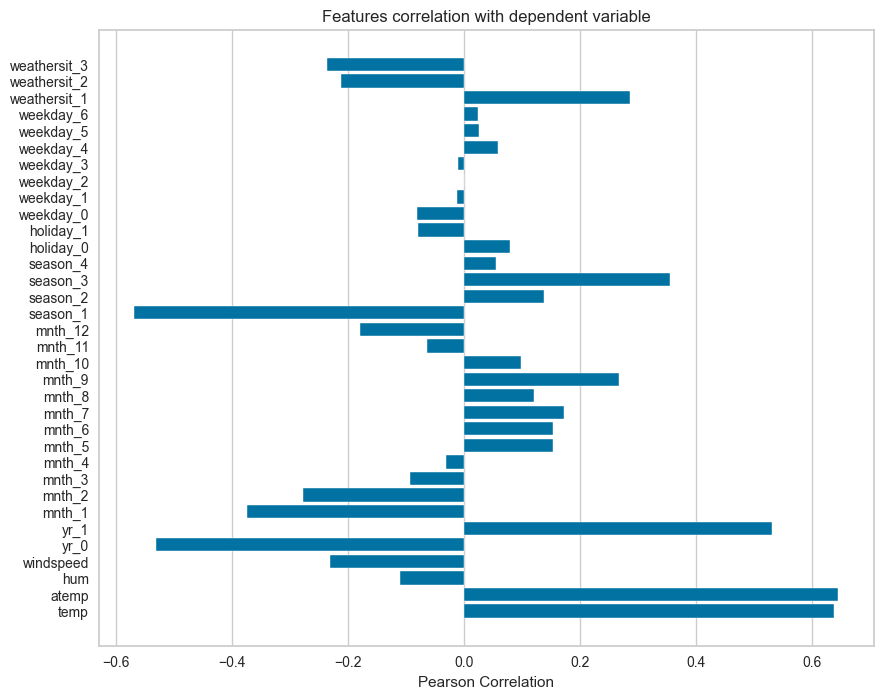

In [130]:
plt.figure(figsize=(10,8))
visualizer = feature_correlation(X_train, y_train, labels=list(X_train.columns),method='pearson');

##### A continunación compararemos y comentaremos un poco la dependencia lineal entre la característica objetivo contra las demás características.

Como bien sabemos, el coeficiente de correlación de Pearson puede abarcar un rango de -1 a 1. Y dos características tienen una correlación positiva perfecta si r = 1, ninguna correlación si r = 0 y una correlación negativa perfecta si r = -1. Como podemos ver en la lista anterior, o en los gráficos anteriores, podemos notar, lo siguente, por orden de correlación:

*CORRELACIÓN POSITIVA*

- Existe una correlación positiva evidente entre las variables **temp** i **atemp** contra la variable **cnt** ya que si hace calor o la sensació térmica es superior, esperamos que haya un mayor número de ciclistas.

- Exsiste una correlación positiva entre las variables **season2, season3, season4** contra la variable **cnt** ya que durante las épocas de primavera, verano y otoño, respectivamente se hará un uso mayor diario de bicicletas. 

- Esto también lo podemos extender a los meses que se incluyen en cada época del año, como vemos, los meses que pertenecen a una época en concreto de las tres vistas en el punto anterior, tendran una relación positiva con la variable count(**month5, month6, month7, month8, month9, month10**). Vemos que justamente hay meses de transición, como entre (otoño e invierno) y (invierno y primavera) donde la correlación baja con la variable count pasará a ser negativa, puesto que hará más frio y el uso de bicicletas será menor en el primer caso y en el segundo, cuando pasemos de invierno a primavera la correlació negativa será menor ya que cada vez usaremos más bicicletas diáriamente.

- También cabe destacar que tenemos una relación positiva fuerte con la variable **yr1** y la variable **cnt**, al parecer me parece interesante que justamente en el año 2012 se registrasen un mayor número de ciclistas.


*CORRELACIÓN NEGATIVA*

- Existe una correlación importante negativa entre la variable **season1** y la variable **cnt**, esto es evidente ya que en el época de invierno debido al frio se usarán menos bicicletas.

- Esto se puede extender a los meses que pertencen a la época de invierno con los meses que transicionan la siguiente época del año(**month11, month12, month1, month2, month3, month4**). Inclusive la baja en la correlacion al month4 que ocurre la transicion a la correlacion positiva vista arriba. 

- También tenemos una correlación negativa importante segun el tiempo que nos dan las variables **weather_sit2** y **weather_sit3**. Ya que si llueve, o nieva, o hay niebla o está nublado, es más probable que los ciudadanos decidan no coger la bicicleta. 

- Eso se extiende a las variables **hum** y **windspeed**, pues si hace peor tiempo, el viento sopla más fuerte, el número de bicicletas que se usarán en la ciudad y que computaremos será menor.

- Vemos que curiosamente si es domingo, sabremos que se van a usar menos bicicletas puesto que la gente alomejor prefiere quedarse en casa.

*CORRELACIÓN PRÓXIMA A 0*

Observamos que no existe casi corerlación entre la variables que siguien y la variable objetivo:

- Vemos que dependiendo el dia de la semana afecta poco o casi nada al conteo de bicicletas. Si se trata de los días (**martes, miércoles, viernes, sábado**) (**wweekday2, weekday3, weekday5, weekday6**) apenas afecta sobre la variable count.

##### Vemos como se ha realizado el escalado de las variables

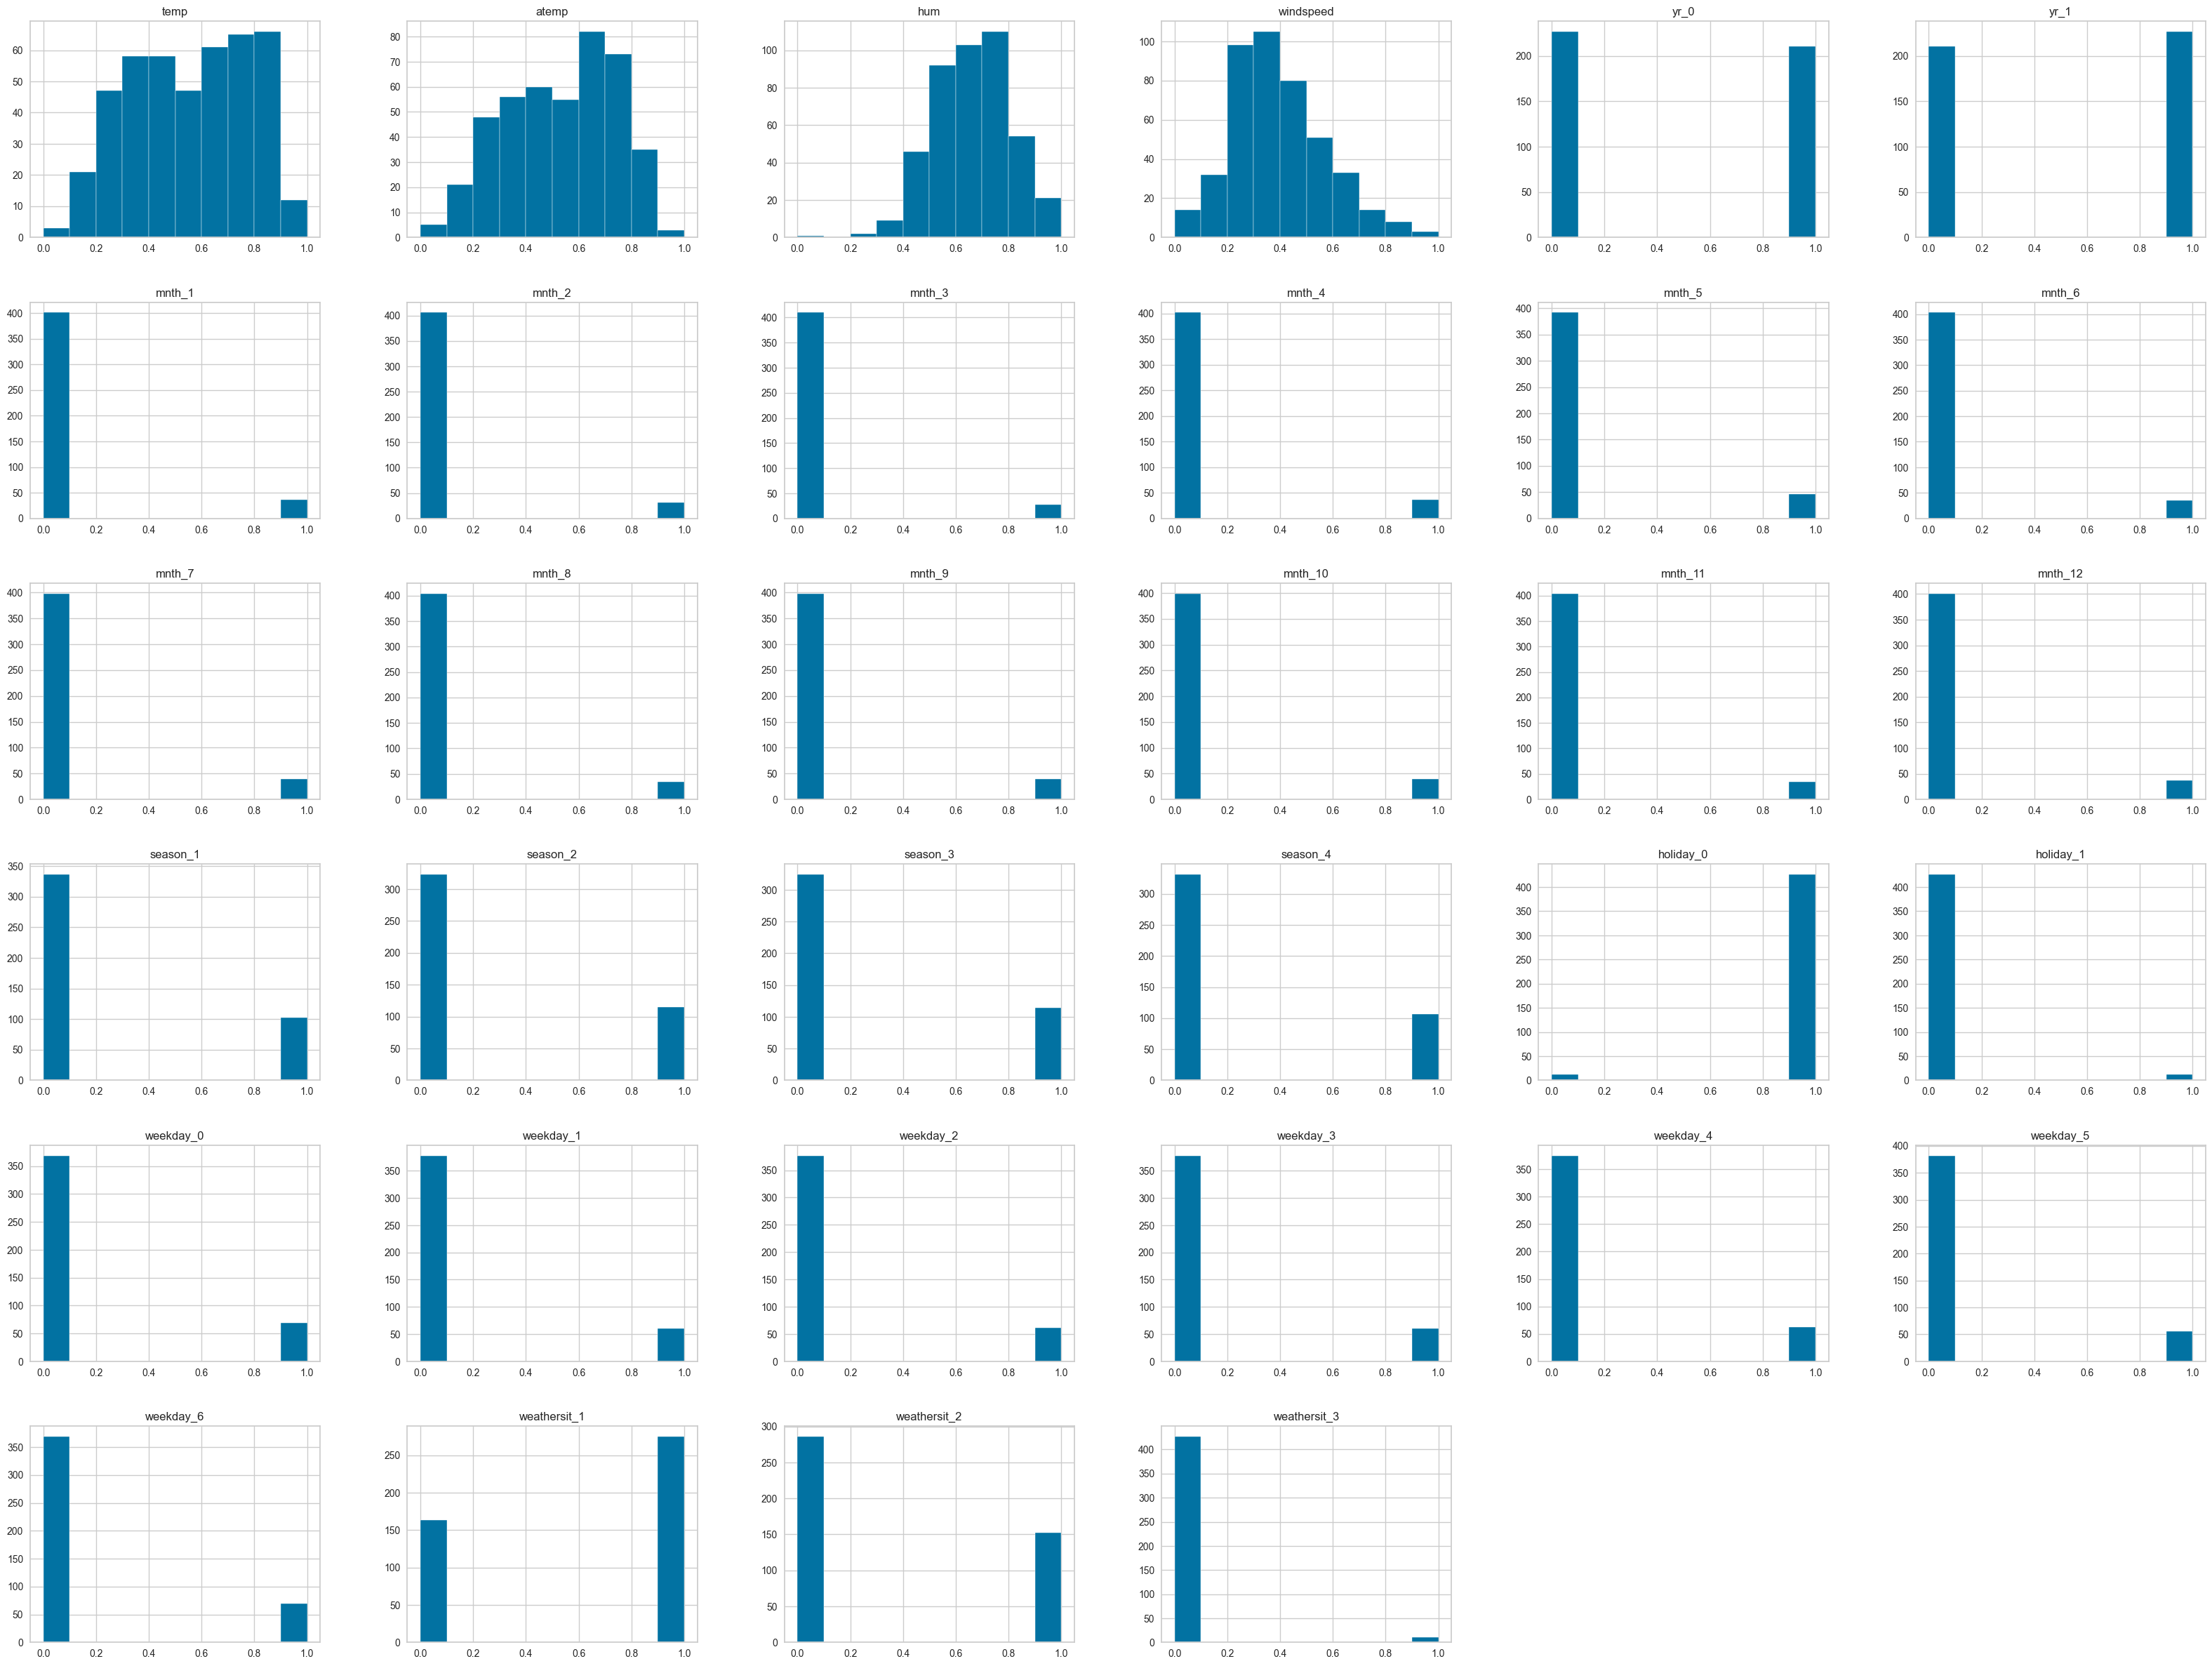

In [131]:
X_train.hist(figsize=(40,30));

### Probamos de ajustar un modelo lineal

In [132]:
lr = LinearRegression();
lr.fit(X_train,y_train);
y_pred = lr.predict(X_train);

weights = lr.coef_
intercept = lr.intercept_

print('Pesos: \n', weights[:])
print('Interceptor: \n', intercept)

Pesos: 
 [ 1.67940574e+01  4.23306224e+03 -1.14607465e+03 -7.61202221e+02
  2.07610791e+16  2.07610791e+16 -3.03327529e+15 -3.03327529e+15
 -3.03327529e+15 -3.03327529e+15 -3.03327529e+15 -3.03327529e+15
 -3.03327529e+15 -3.03327529e+15 -3.03327529e+15 -3.03327529e+15
 -3.03327529e+15 -3.03327529e+15 -1.73291377e+16 -1.73291377e+16
 -1.73291377e+16 -1.73291377e+16  1.38399439e+16  1.38399439e+16
  1.90280938e+16  1.90280938e+16  1.90280938e+16  1.90280938e+16
  1.90280938e+16  1.90280938e+16  1.90280938e+16 -7.63003600e+16
 -7.63003600e+16 -7.63003600e+16]
Interceptor: 
 4.303365614854781e+16


In [133]:
import statsmodels.api
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     81.00
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          4.44e-148
Time:                        23:40:57   Log-Likelihood:                -3520.4
No. Observations:                 438   AIC:                             7099.
Df Residuals:                     409   BIC:                             7217.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          919.8802    131.516      6.994      0.000     661.348    1178.412
temp            16.7941   2377.175      0.007      0.994   -4656.212    4689.800
atemp         4282.5277   2422.186      1.768      0.078    -478.960    9044.015
hum          -1366.3616    358.760     -3.809      0.000   -2071.606    -661.117
windspeed     -839.4314    245.454     -3.420      0.001   -1321.940    -356.923
yr_0          -519.4713     77.252     -6.724      0.000    -671.332    -367.611
yr_1          1439.3515     74.683     19.273      0.000    1292.542    1586.161
mnth_1         -90.0457    234.220     -0.384      0.701    -550.470     370.379
mnth_2          78.8064    224.862      0.350      0.726    -363.223     520.836
mnth_3         462.7565    180.423      2.565      0.011     108.084     817.429
mnth_4         260.8741    209.075      1.248      0.213    -150.122     671.870
mnth_5         465.9194    213.431      2.183      0.030      46.360     885.478
mnth_6         153.6922    214.058      0.718      0.473    -267.099     574.483
mnth_7        -422.3946    233.353     -1.810      0.071    -881.115      36.326
mnth_8        -120.5560    229.573     -0.525      0.600    -571.846     330.734
mnth_9         698.0438    175.001      3.989      0.000     354.030    1042.058
mnth_10        139.9368    198.868      0.704      0.482    -250.994     530.868
mnth_11       -436.4324    218.774     -1.995      0.047    -866.495      -6.370
mnth_12       -270.7202    188.805     -1.434      0.152    -641.870     100.430
season_1      -649.8871    164.420     -3.953      0.000    -973.101    -326.673
season_2       224.2151    167.752      1.337      0.182    -105.548     553.978
season_3       334.9118    163.952      2.043      0.042      12.618     657.205
season_4      1010.6404    160.517      6.296      0.000     695.099    1326.182
holiday_0      825.5874    118.872      6.945      0.000     591.911    1059.264
holiday_1       94.2928    160.143      0.589      0.556    -220.514     409.099
weekday_0     -136.0359     91.757     -1.483      0.139    -316.411      44.339
weekday_1       43.9125    100.571      0.437      0.663    -153.788     241.613
weekday_2      113.1547     95.985      1.179      0.239     -75.530     301.839
weekday_3      194.2354     96.088      2.021      0.044       5.348     383.123
weekday_4      143.0351     94.013      1.521      0.129     -41.774     327.844
weekday_5      276.2560     98.043      2.818      0.005      83.525     468.987
weekday_6      285.3225     91.013      3.135      0.002     106.412     464.233
weathersit_1  1110.9272     93.019     11.943      0.000     928.073    1293.782
weathersit_2   540.5488     97.414      5.549      0.000     349.055     732.043
weathersit_3  -731.5957    189.995     -3.851      0.000   -1105.084    -358.108
=====

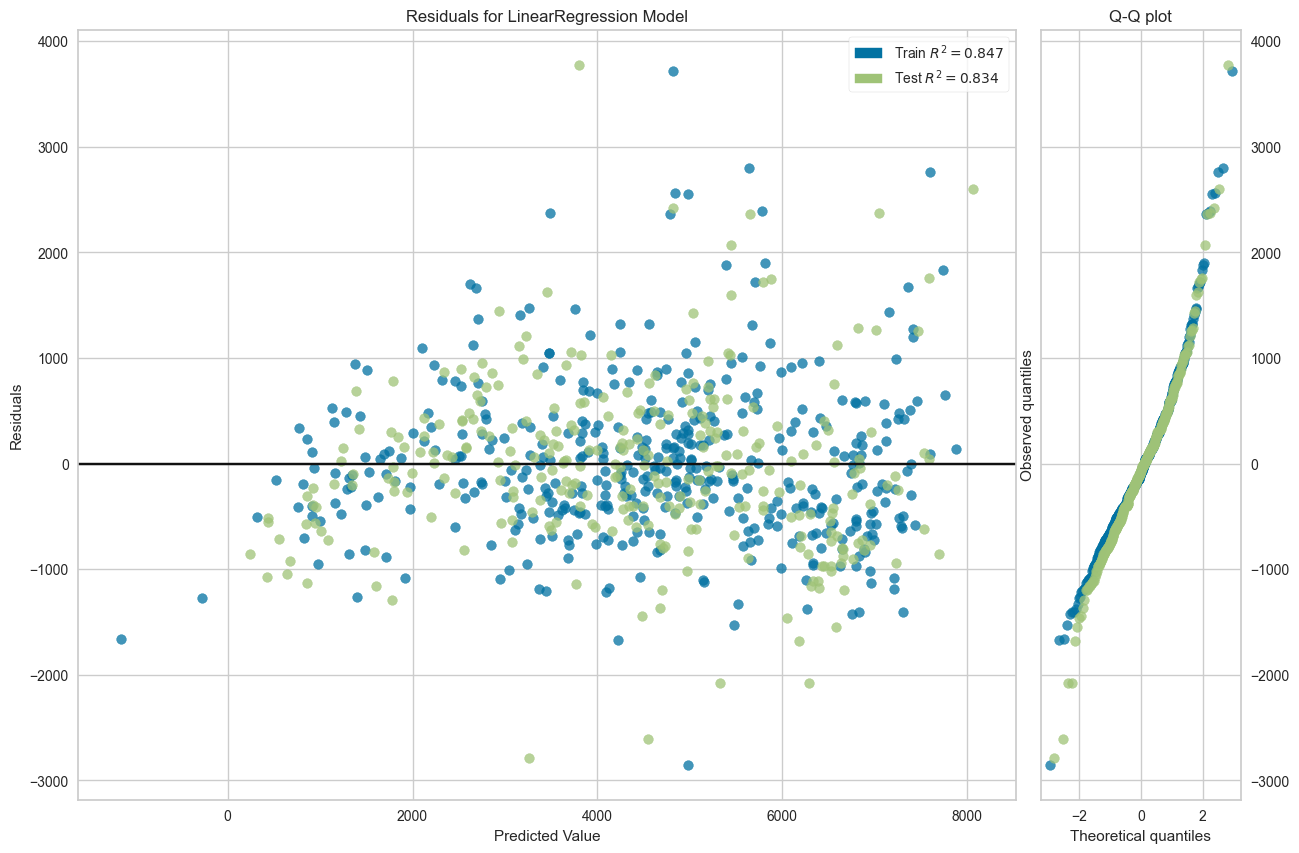

In [134]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(15,10));
viz = residuals_plot(lr, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

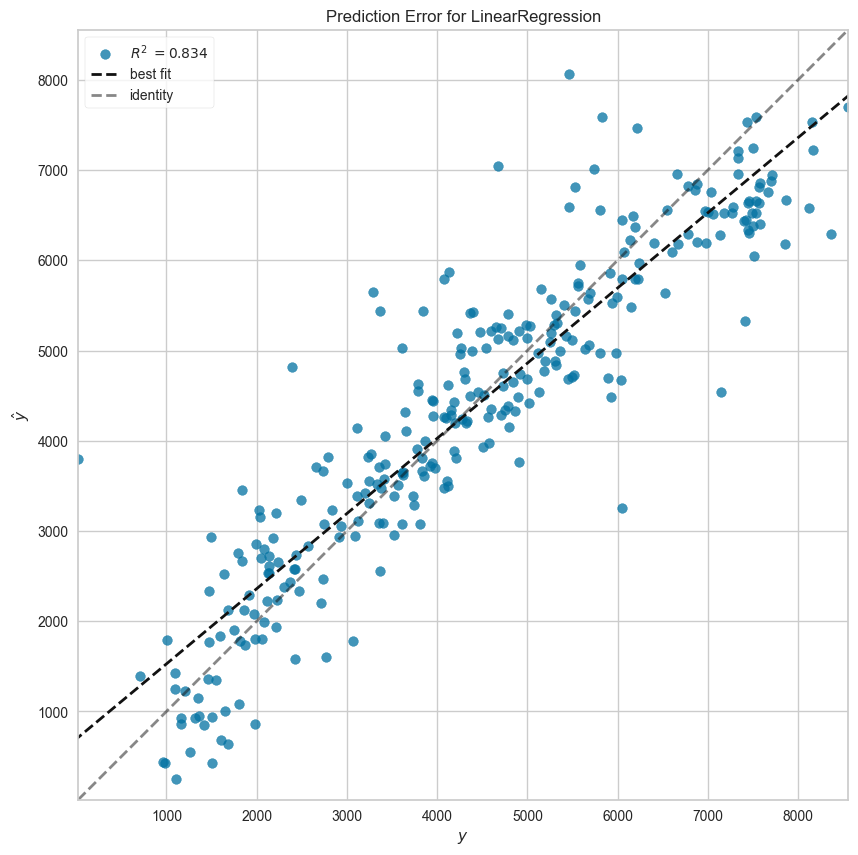

In [135]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(15,10))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

#### Aplicamos Validación cruzada

In [136]:
cross_val_metrics = pd.DataFrame(columns=['MSE', 'norm_MSE', 'R2'])

kf = KFold(n_splits=10)
i=1
for train_index, test_index in kf.split(X_train):
    print('Split {}: \n\tTest Folds: [{}] \n\tTrain Folds {}'.format(i, i, [j for j in range(1,11) if j != i]));
    
    x_train_fold = X_train.values[train_index]
    y_train_fold = y_train.values[train_index]
    x_test_fold = X_train.values[test_index,:]
    y_test_fold = y_train.values[test_index]
    
    lr = LinearRegression().fit(x_train_fold,y_train_fold)
    y_pred_fold = lr.predict(x_test_fold)
    fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
    fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
    fold_r2 = r2_score(y_test_fold, y_pred_fold)
    print(f'\tMSE: {fold_mse:3.3f} NMSE: {fold_nmse:3.3f} R2: {fold_r2:3.3f}')

    cross_val_metrics.loc[f'Fold {i}', :] = [fold_mse,fold_nmse, fold_r2]
    i+=1

Split 1: 
	Test Folds: [1] 
	Train Folds [2, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 634421.432 NMSE: 0.198 R2: 0.802
Split 2: 
	Test Folds: [2] 
	Train Folds [1, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 582390.795 NMSE: 0.157 R2: 0.843
Split 3: 
	Test Folds: [3] 
	Train Folds [1, 2, 4, 5, 6, 7, 8, 9, 10]
	MSE: 796269.409 NMSE: 0.194 R2: 0.806
Split 4: 
	Test Folds: [4] 
	Train Folds [1, 2, 3, 5, 6, 7, 8, 9, 10]
	MSE: 904457.682 NMSE: 0.213 R2: 0.787
Split 5: 
	Test Folds: [5] 
	Train Folds [1, 2, 3, 4, 6, 7, 8, 9, 10]
	MSE: 693003.636 NMSE: 0.185 R2: 0.815
Split 6: 
	Test Folds: [6] 
	Train Folds [1, 2, 3, 4, 5, 7, 8, 9, 10]
	MSE: 748262.841 NMSE: 0.334 R2: 0.666
Split 7: 
	Test Folds: [7] 
	Train Folds [1, 2, 3, 4, 5, 6, 8, 9, 10]
	MSE: 903585.705 NMSE: 0.244 R2: 0.756
Split 8: 
	Test Folds: [8] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 9, 10]
	MSE: 616374.864 NMSE: 0.154 R2: 0.846
Split 9: 
	Test Folds: [9] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 8, 10]
	MSE: 535670.814 NMSE: 0.161 R2: 0.839
Split 10: 
	Test Fo

In [137]:
cross_val_metrics.loc['Mean',:] = cross_val_metrics.mean()
cross_val_metrics

,MSE,norm_MSE,R2
Fold 1,634421.431818,0.198473,0.801527
Fold 2,582390.795455,0.156706,0.843294
Fold 3,796269.409091,0.193836,0.806164
Fold 4,904457.681818,0.213189,0.786811
Fold 5,693003.636364,0.18538,0.81462
Fold 6,748262.840909,0.334349,0.665651
Fold 7,903585.704545,0.243823,0.756177
Fold 8,616374.863636,0.15387,0.84613
Fold 9,535670.813953,0.161129,0.838871
Fold 10,445845.162791,0.127815,0.872185


In [138]:
lr = LinearRegression().fit(X_train,y_train);
folds_r2 = cross_val_score(lr, X_train,y_train, cv=10, scoring='r2')
lr_r2 = np.mean(folds_r2) 
folds_r2, lr_r2

(array([0.79845026, 0.84412913, 0.83522893, 0.78462347, 0.81666062,
        0.66221431, 0.75546904, 0.85801163, 0.83496603, 0.86853545]),
 0.8058288867594333)

In [139]:
r2_results = pd.DataFrame({'lr':lr_r2},index=['CV R2'])
valorLRr2 = lr_r2
r2_results.loc['Train R2', :] =[r2_score(y_train,lr.predict(X_train))]
r2_results.loc['lambda','lr']=0
r2_results

,lr
CV R2,0.805829
Train R2,0.846842
lambda,0.000000


#### b) Aplicad algun método de reducción de dimensionalidad a los datos de entrenamiento y comentad lo que se pueda apreciar en la visualización. Pensad en qué podéis representar sobre la transformación.

Así pues este análisis de Componentes Princiaples(PCA) se basa en la matriz de covarianza de las variables. Por esta razón, si queremos que funcione de la mejor manera, debemos estandarizar los datos. Esto cambiará los datos para que todas las variables tengan media 0 y desviación estándar 1.

Con esta nueva representación queremos encuentrar las dimensiones linealmente independientes que puedan representar sin pérdidas el conjunto de de datos. Estas dimensiones recién encontradas nos deberían permitir predecir/reconstruir las dimensiones originales. Así pues, si minimizamos el error de reconstrucción/proyección de los datos, nuestra varianza augmentará.

In [140]:
X_train_standarized = X_train.copy()
scaler = StandardScaler()
X_train_standarized[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train_standarized.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,438.0,-1.074736e-16,1.001144,-2.480716,-0.869992,0.108509,0.863638,1.987637
atemp,438.0,3.447268e-17,1.001144,-2.531515,-0.801925,0.172512,0.807409,2.233770
hum,438.0,9.287345e-16,1.001144,-4.569408,-0.735420,0.043630,0.702780,2.332221
windspeed,438.0,-4.461170e-17,1.001144,-2.251317,-0.719737,-0.161272,0.583358,3.452140
yr_0,438.0,1.622244e-17,1.001144,-0.964114,-0.964114,-0.964114,1.037222,1.037222
yr_1,438.0,-1.622244e-17,1.001144,-1.037222,-1.037222,0.964114,0.964114,0.964114
mnth_1,438.0,3.244487e-17,1.001144,-0.303759,-0.303759,-0.303759,-0.303759,3.292087
mnth_2,438.0,6.894536e-17,1.001144,-0.280745,-0.280745,-0.280745,-0.280745,3.561952
mnth_3,438.0,-1.622244e-17,1.001144,-0.261329,-0.261329,-0.261329,-0.261329,3.826599
mnth_4,438.0,-3.650048e-17,1.001144,-0.299253,-0.299253,-0.299253,-0.299253,3.341656


In [141]:
X_test_standarized = X_test.copy()
X_test_standarized[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test_standarized.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,293.0,-0.129097,1.042519,-2.272529,-1.032888,-0.211639,0.777651,1.918039
atemp,293.0,-0.147146,1.041438,-2.407855,-1.031907,-0.167167,0.729342,2.004778
hum,293.0,-0.167353,1.044390,-3.221945,-0.954267,-0.243194,0.566480,2.403926
windspeed,293.0,0.089472,1.129151,-1.912742,-0.719792,-0.042868,0.659514,4.348809
yr_0,293.0,0.087783,1.001065,-0.964114,-0.964114,1.037222,1.037222,1.037222
yr_1,293.0,-0.087783,1.001065,-1.037222,-1.037222,-1.037222,0.964114,0.964114
mnth_1,293.0,0.003054,1.006267,-0.303759,-0.303759,-0.303759,-0.303759,3.292087
mnth_2,293.0,0.047130,1.075346,-0.280745,-0.280745,-0.280745,-0.280745,3.561952
mnth_3,293.0,0.213038,1.311497,-0.261329,-0.261329,-0.261329,-0.261329,3.826599
mnth_4,293.0,-0.001021,1.000153,-0.299253,-0.299253,-0.299253,-0.299253,3.341656


#### Como se verian las variables sin realizar el PCA... y la poca información que podemos sacar de nuestro conjunto de datos

<AxesSubplot:xlabel='hum', ylabel='windspeed'>

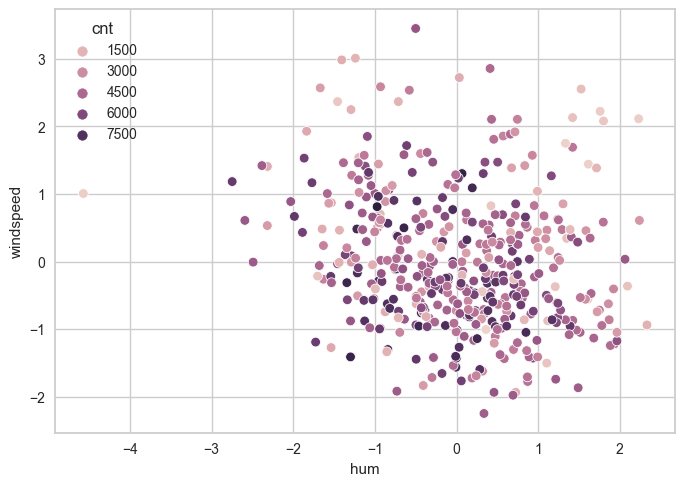

In [142]:
sns.scatterplot(x=X_train_standarized.iloc[:,2], y=X_train_standarized.iloc[:,3], hue=y_train)

<AxesSubplot:xlabel='atemp', ylabel='mnth_1'>

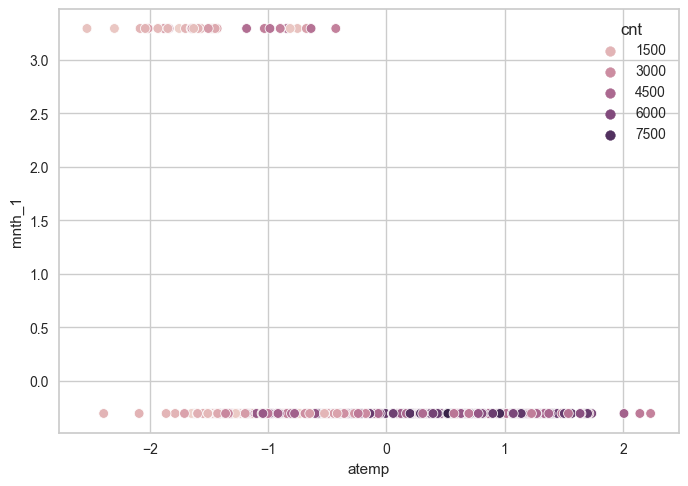

In [143]:
sns.scatterplot(x=X_train_standarized.iloc[:,1], y=X_train_standarized.iloc[:,6], hue=y_train)

In [144]:
myPCA = PCA().fit(X_train_standarized[X_train.columns]);

#PCA.explained_variance_ratio_ para comprender qué porcentaje de varianza explican los datos
print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

[1.22986788e-01 7.61207135e-02 7.30001266e-02 6.71363675e-02
 6.28458496e-02 5.81319187e-02 4.05429520e-02 3.80770733e-02
 3.64157911e-02 3.55327449e-02 3.48113356e-02 3.34589832e-02
 3.26882790e-02 3.20652201e-02 3.17556233e-02 3.10724146e-02
 3.03484343e-02 2.97079886e-02 2.90150615e-02 2.76513555e-02
 2.51326139e-02 2.39646220e-02 1.20354720e-02 5.88121538e-03
 5.08600345e-03 2.61759696e-03 1.84254421e-03 7.49113387e-05
 2.42548672e-32 9.82068724e-33 9.38177539e-33 6.99384770e-33
 1.70715278e-33 8.52235238e-34]
[0.12298679 0.1991075  0.27210763 0.339244   0.40208985 0.46022176
 0.50076472 0.53884179 0.57525758 0.61079033 0.64560166 0.67906064
 0.71174892 0.74381414 0.77556977 0.80664218 0.83699062 0.8666986
 0.89571367 0.92336502 0.94849763 0.97246226 0.98449773 0.99037894
 0.99546495 0.99808254 0.99992509 1.         1.         1.
 1.         1.         1.         1.        ]


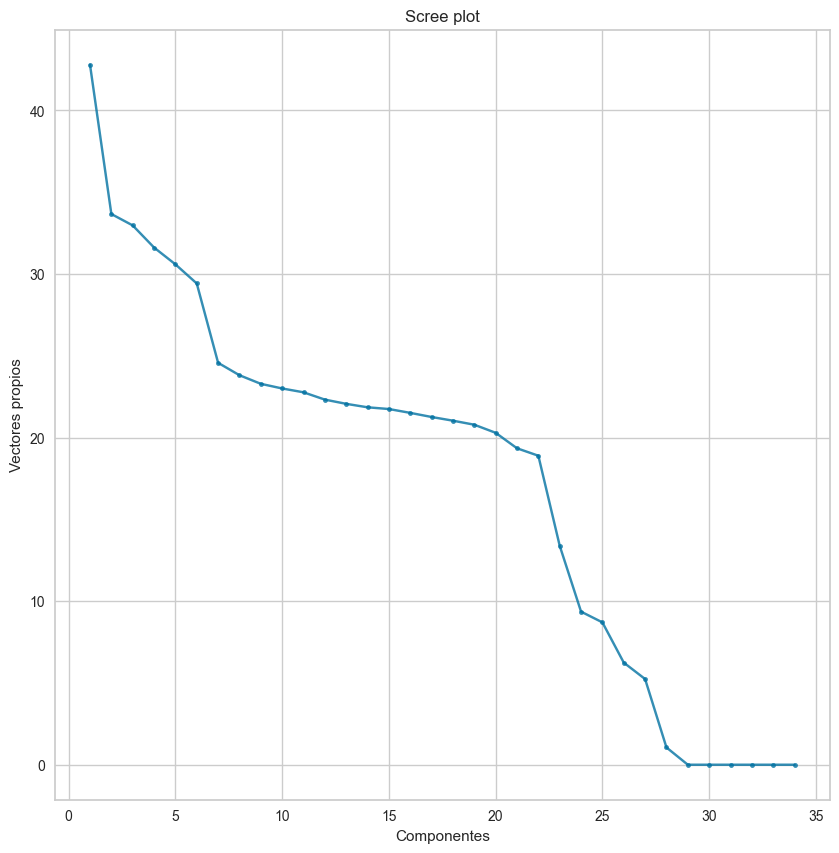

In [145]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
#La nueva base son los vectores propios de la matriz de covarianza.
y_label = plt.ylabel('Vectores propios');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

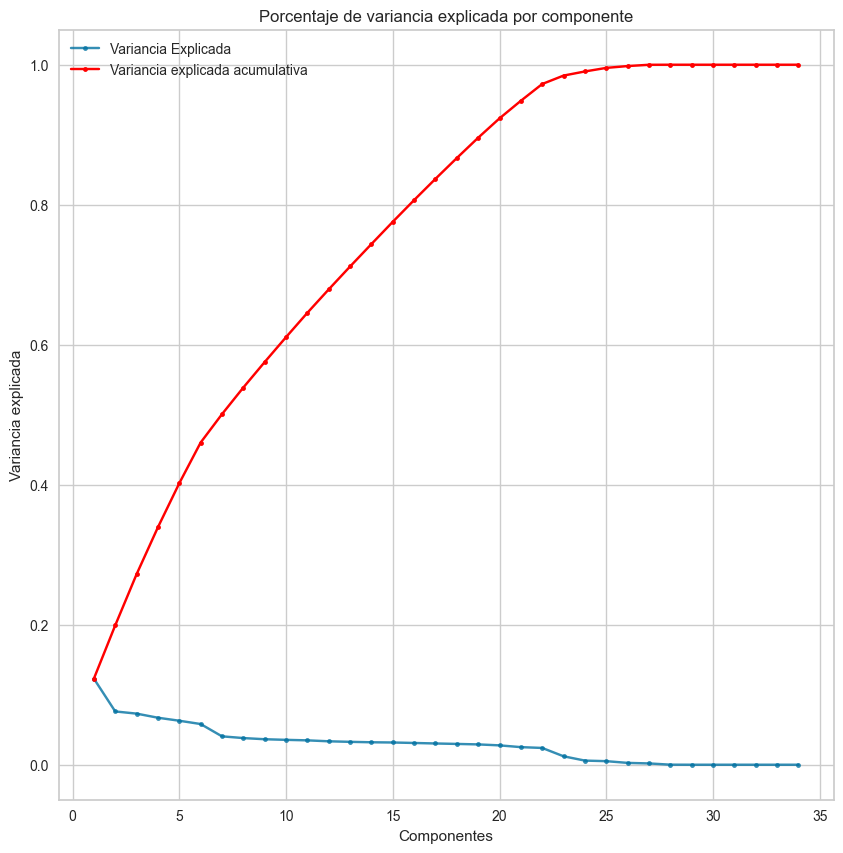

In [146]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

La varianza explicativa acumulada nos muestra que necesitamos un número muy grande de componentes para retener la mayor parte de la información. Eso es así ya que hemos partido las variables categóricas mediante el one-hot encoding en k features. Vemos que para poder explicar un 90/95% necesitamos 19/20 componentes. 

Además también probamos usando el método `drop_first=True` para ver como se comportaba la varianza reduciedo las k features a k-1 para reducir la correlación entre estas k variables. Lo que sucedia es que solamente hacian falta 15/16 componentes para explicar el 90/95% de la varianza.

Si juntásemos las variables, y no decidieramos hacer la codificación en one-hot encoding, lo que sucederia es que necesitariamos un número pequeño de componentes para explicar la mayor parte de la varianza. 

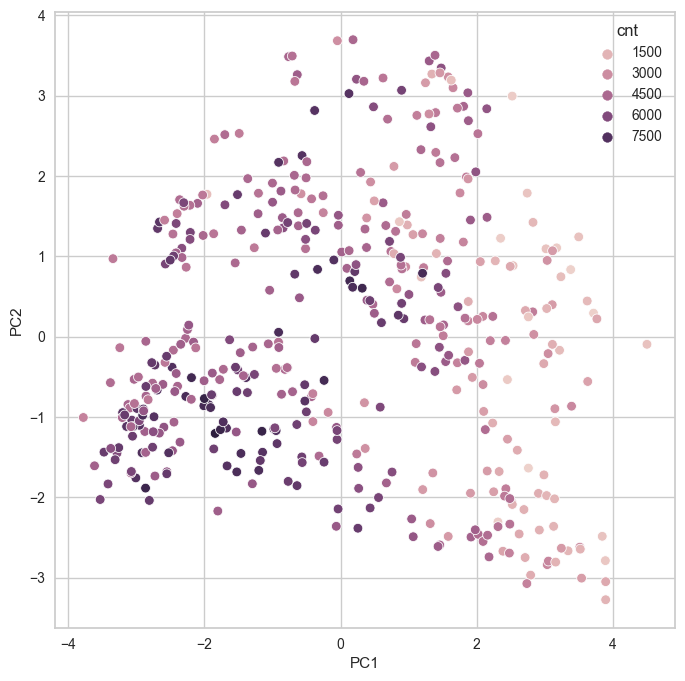

In [147]:
transformed_train = myPCA.transform(X_train_standarized[X_train.columns])
transformed_train

X_train_standarized[['PC1','PC2','PC3']] = transformed_train[:,:3]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train)

In [148]:
import plotly.express as px

fig = px.scatter_3d(X_train_standarized, x='PC1', y='PC2', z='PC3',color=y_train)
fig.show()

Como vemos tanto en el gráfico 2D, como 3D, únicamente con dos componentes no nos es suficente para poder separar bien los datos. Aunque si que es cierto que podemos intuir un cierto patrón en estos. Ligeramente podemos observar como de alguna forma se intentan agrupar en función de la similitud el número de bicicletas contadas. Podemos ver como de alguna manera se intentan juntar los valores mínimos, como también los valores medios del número de bicicletas aunque como podemos ver no tenemos los datos bien agrupados.

Lo que pudimos observar cuando usamos el método `drop_first=True`es que gracias a la eliminación de la colinealidades entre variables dummies, el PCA que obteniamos era mucho mas claro. Ya que se nos formaron cinco grupos, donde en cada uno se podia empezar a intuir cierta distinción de la variable objectivo en base al número de biciletas contadas aunque tampoco la distinción era clara. pero si que era muchoo mejor que la que podemos apreciar.

Notamos que el PCA variará en función de como hagamos hecho la codificación de one-hot encoding, ya que si usamos `drop_first=True` nos permitirá ver mucha más información que si no usamos esta opción. Esto es así ya que al tener unicamente en cuenta k-1 features de k descomposiciones possibles de una feature, reducimos la colinealidad y nos permite visualizar mejor los datos.

##### Como curiosidad podemos ver el gráfico de loadings i fijarnos en la longitud de los vectors que influyen en cada componente

In [149]:
loadings = myPCA.components_.T * np.sqrt(myPCA.explained_variance_ratio_)

fig = px.scatter(X_train_standarized, x='PC1', y='PC2', color=y_train)

for i, feature in enumerate(X_train.columns):
    fig.add_shape(type='line',x0=0, y0=0,x1=loadings[i, 0],y1=loadings[i, 1])
    fig.add_annotation(x=loadings[i, 0],y=loadings[i, 1],ax=0, ay=0,xanchor="center",yanchor="bottom",text=feature,)
fig.show()

#### c) La variable a predecir es un conteo. En este caso podría tener sentido utilizar un regresor que use un modelo adecuado para este tipo de datos como el $\texttt{PoissonRegressor}$ de scikit-learn. Veréis que tiene un parámetro de regularización $\texttt{alpha}$ que necesitaréis ajustar usando validación cruzada. Con el mejor parámetro de regularización según el error de validación cruzada, ajustad el modelo con los datos de entrenamiento y calculad la $\textit{calidad}$ del modelo con los datos de test.

Es importante aclarar que Poisson no admite valores negativos por lo que si es necesario haria falta deshacernos de ellos

In [150]:
poisson_cross_val_metrics = pd.DataFrame(columns=['mean MSE', 'mean norm_MSE', 'mean R2'])
alphas = [1e-10,1e-5,1e-4,1e-3,1e-2,0,0.1, 0.5,1,5,10,40,42,43,45,46,47,48,49,50,53,54,60,70,80,100,1000,10000]

for alpha_val in alphas:
    kf = KFold(n_splits=10)
    i=1
    cv_mse = []
    cv_nmse = []
    cv_r2 = []

    for train_index, test_index in kf.split(X_train):
        x_train_fold = X_train.values[train_index]
        y_train_fold = y_train.values[train_index]
        x_test_fold = X_train.values[test_index,:]
        y_test_fold = y_train.values[test_index]

        pr = PoissonRegressor(alpha=alpha_val, max_iter=3000)
        pr.fit(x_train_fold,y_train_fold)
        y_pred_fold = pr.predict(x_test_fold)
        fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
        fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
        fold_r2 = r2_score(y_test_fold, y_pred_fold)
        cv_mse.append(fold_mse)
        cv_nmse.append(fold_nmse)
        cv_r2.append(fold_r2)
    poisson_cross_val_metrics.loc[f'Alpha={alpha_val}',:] = [np.mean(cv_mse),np.mean(cv_nmse),np.mean(cv_r2)]

poisson_cross_val_metrics.sort_values(by='mean R2',ascending=False)

,mean MSE,mean norm_MSE,mean R2
Alpha=45,729782.073329,0.207304,0.792696
Alpha=43,729566.863606,0.207305,0.792695
Alpha=46,729909.072054,0.207311,0.792689
Alpha=42,729480.063505,0.207313,0.792687
Alpha=47,730051.128271,0.207323,0.792677
Alpha=48,730201.128321,0.207337,0.792663
Alpha=40,729355.835671,0.207345,0.792655
Alpha=49,730365.030702,0.207357,0.792643
Alpha=50,730538.534778,0.20738,0.79262
Alpha=53,731121.203069,0.20747,0.79253


##### Vemos que la mejor alpha obtenida es 45

In [151]:
poison_cv = PoissonRegressor(alpha=45, max_iter=3000).fit(X_train,y_train);
print("Coeficientes:\n",poison_cv.coef_);

Coeficientes:
 [ 0.3478958   0.36354516 -0.12118355 -0.15313295 -0.218854    0.21884924
 -0.15975288 -0.03699044  0.08990237  0.01849724  0.07691771  0.04717385
 -0.04290541  0.00779769  0.12687352  0.04124715 -0.07825297 -0.09051259
 -0.26072102  0.04878195  0.04214098  0.16979333  0.08138836 -0.08139312
 -0.05628236 -0.00801399  0.0030021   0.00317694  0.00516803  0.0320388
  0.02090572  0.22405387  0.07298437 -0.297043  ]


In [152]:
print("Train error:",poison_cv.score(X_train,y_train));
print("Test error:",poison_cv.score(X_test,y_test));

Train error: 0.8082572887000468
Test error: 0.824082003048318


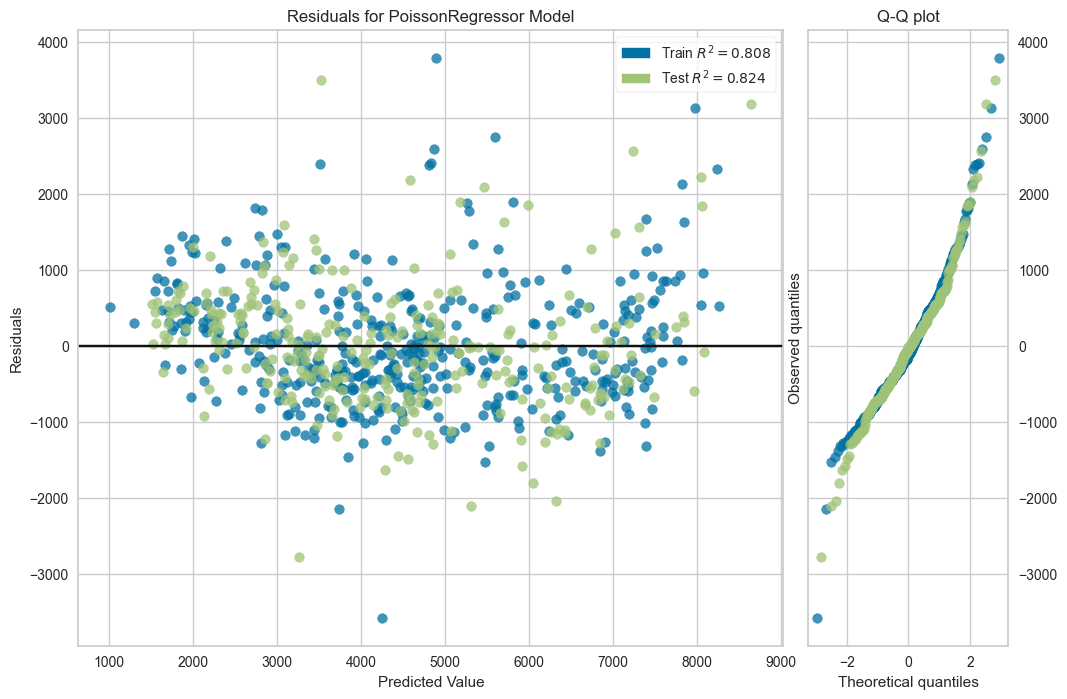

In [153]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(12,8));
viz = residuals_plot(poison_cv, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

In [154]:
plt.figure(figsize = (20,1));
weights = pd.DataFrame({'poison_cv':poison_cv.coef_},index=X_train.columns)
weights.T

,temp,atemp,hum,windspeed,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
poison_cv,0.347896,0.363545,-0.121184,-0.153133,-0.218854,0.218849,-0.159753,-0.03699,0.089902,0.018497,...,-0.056282,-0.008014,0.003002,0.003177,0.005168,0.032039,0.020906,0.224054,0.072984,-0.297043


<Figure size 2000x100 with 0 Axes>

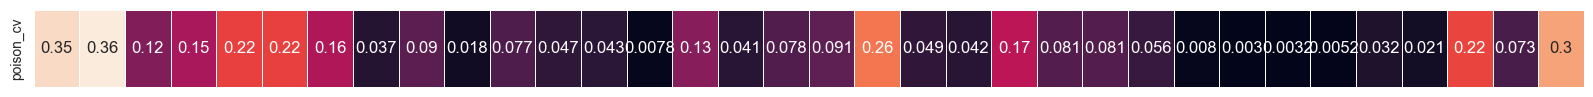

In [155]:
plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['poison_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False);

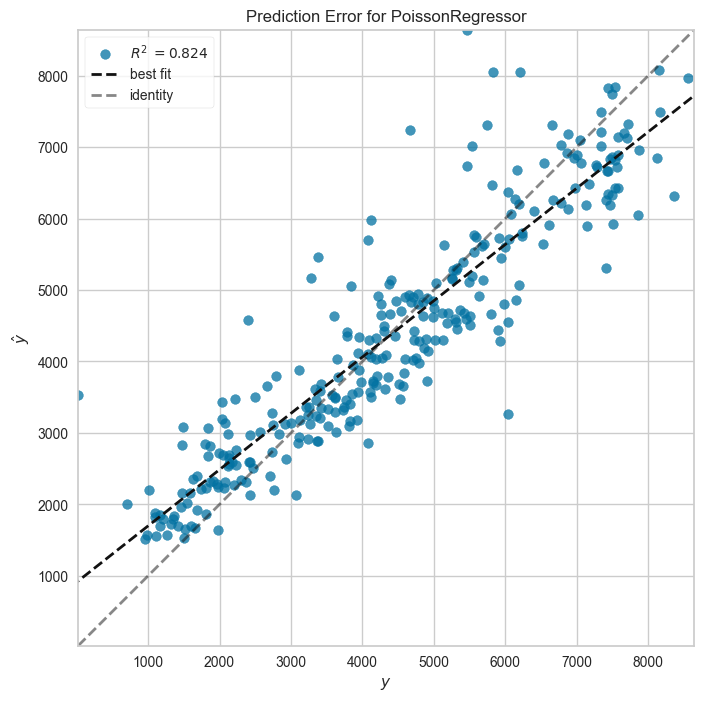

In [156]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8,8))
visualizer = prediction_error(poison_cv, X_test, y_test, is_fitted=True)

##### Calidad del modelo con los datos de test.

In [157]:
r2_results2 = pd.DataFrame({'poison_cv':poison_cv.score(X_test,y_test)},index=['CV R2'])
r2_results2.loc['Train R2', :] = [r2_score(y_train,poison_cv.predict(X_train))]
r2_results2.loc['lambda','poison_cv']= poison_cv.alpha
r2_results2

,poison_cv
CV R2,0.824082
Train R2,0.826671
lambda,45.000000


#### d) A veces el modelo que parece adecuado no lo es tanto después de todo. Ajustad una regresión lineal a los datos y calculad la $\textit{calidad}$ del modelo empleando validación cruzada y con los datos de test.

In [158]:
lr = LinearRegression();
lr.fit(X_train,y_train);
y_pred = lr.predict(X_train);

weights = lr.coef_
intercept = lr.intercept_

print('Pesos: \n', weights[:])
print('Interceptor: \n', intercept)

Pesos: 
 [ 1.67940574e+01  4.23306224e+03 -1.14607465e+03 -7.61202221e+02
  2.07610791e+16  2.07610791e+16 -3.03327529e+15 -3.03327529e+15
 -3.03327529e+15 -3.03327529e+15 -3.03327529e+15 -3.03327529e+15
 -3.03327529e+15 -3.03327529e+15 -3.03327529e+15 -3.03327529e+15
 -3.03327529e+15 -3.03327529e+15 -1.73291377e+16 -1.73291377e+16
 -1.73291377e+16 -1.73291377e+16  1.38399439e+16  1.38399439e+16
  1.90280938e+16  1.90280938e+16  1.90280938e+16  1.90280938e+16
  1.90280938e+16  1.90280938e+16  1.90280938e+16 -7.63003600e+16
 -7.63003600e+16 -7.63003600e+16]
Interceptor: 
 4.303365614854781e+16


In [159]:
import statsmodels.api
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     81.00
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          4.44e-148
Time:                        23:42:36   Log-Likelihood:                -3520.4
No. Observations:                 438   AIC:                             7099.
Df Residuals:                     409   BIC:                             7217.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          919.8802    131.516      6.994      0.000     661.348    1178.412
temp            16.7941   2377.175      0.007      0.994   -4656.212    4689.800
atemp         4282.5277   2422.186      1.768      0.078    -478.960    9044.015
hum          -1366.3616    358.760     -3.809      0.000   -2071.606    -661.117
windspeed     -839.4314    245.454     -3.420      0.001   -1321.940    -356.923
yr_0          -519.4713     77.252     -6.724      0.000    -671.332    -367.611
yr_1          1439.3515     74.683     19.273      0.000    1292.542    1586.161
mnth_1         -90.0457    234.220     -0.384      0.701    -550.470     370.379
mnth_2          78.8064    224.862      0.350      0.726    -363.223     520.836
mnth_3         462.7565    180.423      2.565      0.011     108.084     817.429
mnth_4         260.8741    209.075      1.248      0.213    -150.122     671.870
mnth_5         465.9194    213.431      2.183      0.030      46.360     885.478
mnth_6         153.6922    214.058      0.718      0.473    -267.099     574.483
mnth_7        -422.3946    233.353     -1.810      0.071    -881.115      36.326
mnth_8        -120.5560    229.573     -0.525      0.600    -571.846     330.734
mnth_9         698.0438    175.001      3.989      0.000     354.030    1042.058
mnth_10        139.9368    198.868      0.704      0.482    -250.994     530.868
mnth_11       -436.4324    218.774     -1.995      0.047    -866.495      -6.370
mnth_12       -270.7202    188.805     -1.434      0.152    -641.870     100.430
season_1      -649.8871    164.420     -3.953      0.000    -973.101    -326.673
season_2       224.2151    167.752      1.337      0.182    -105.548     553.978
season_3       334.9118    163.952      2.043      0.042      12.618     657.205
season_4      1010.6404    160.517      6.296      0.000     695.099    1326.182
holiday_0      825.5874    118.872      6.945      0.000     591.911    1059.264
holiday_1       94.2928    160.143      0.589      0.556    -220.514     409.099
weekday_0     -136.0359     91.757     -1.483      0.139    -316.411      44.339
weekday_1       43.9125    100.571      0.437      0.663    -153.788     241.613
weekday_2      113.1547     95.985      1.179      0.239     -75.530     301.839
weekday_3      194.2354     96.088      2.021      0.044       5.348     383.123
weekday_4      143.0351     94.013      1.521      0.129     -41.774     327.844
weekday_5      276.2560     98.043      2.818      0.005      83.525     468.987
weekday_6      285.3225     91.013      3.135      0.002     106.412     464.233
weathersit_1  1110.9272     93.019     11.943      0.000     928.073    1293.782
weathersit_2   540.5488     97.414      5.549      0.000     349.055     732.043
weathersit_3  -731.5957    189.995     -3.851      0.000   -1105.084    -358.108
=====

/var/folders/gs/lcl0qv_d00v1t7b3r7ywshtr0000gn/T/ipykernel_57858/1959025146.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




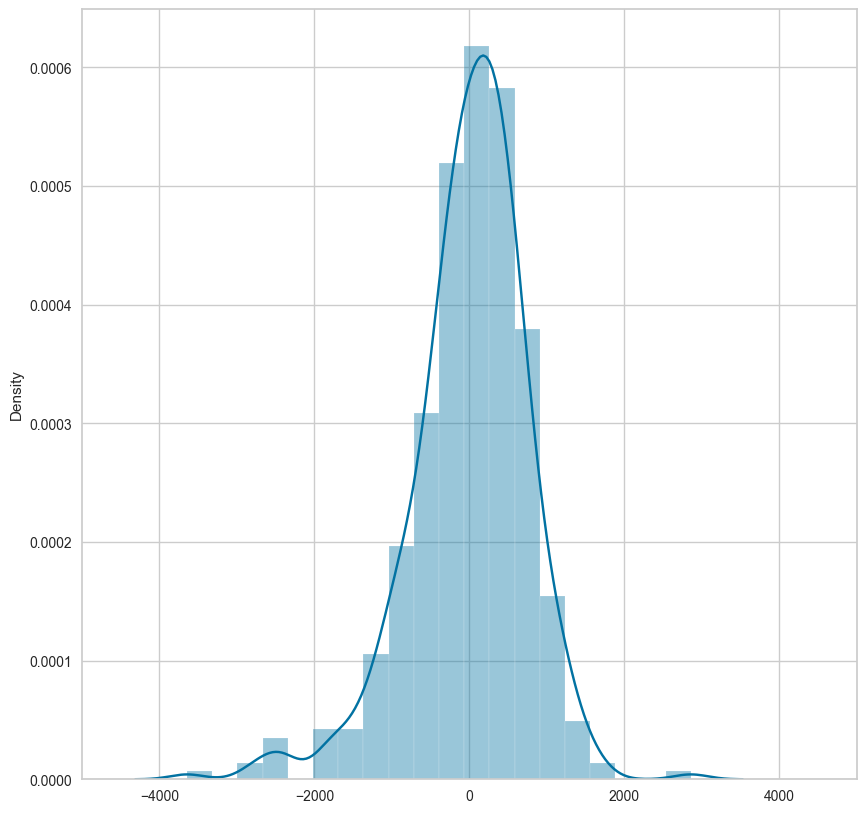

In [160]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([-5000,5000])
sns.distplot(result.resid,bins=20);

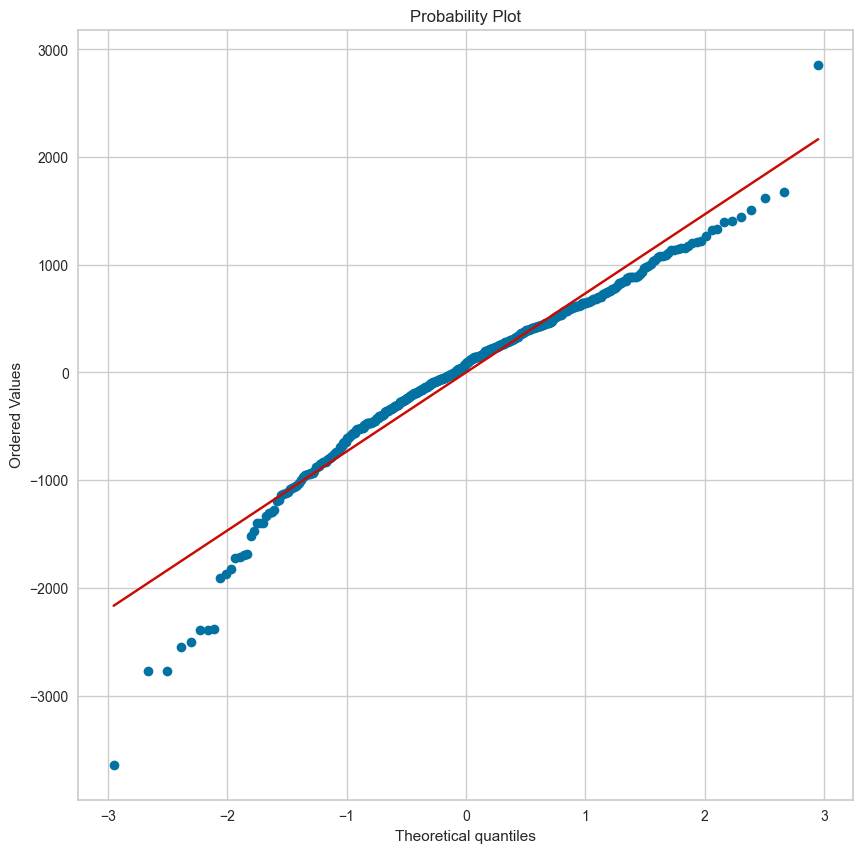

In [161]:
fig, ax = plt.subplots(figsize=(10,10))
stats.probplot(result.resid, plot=plt);

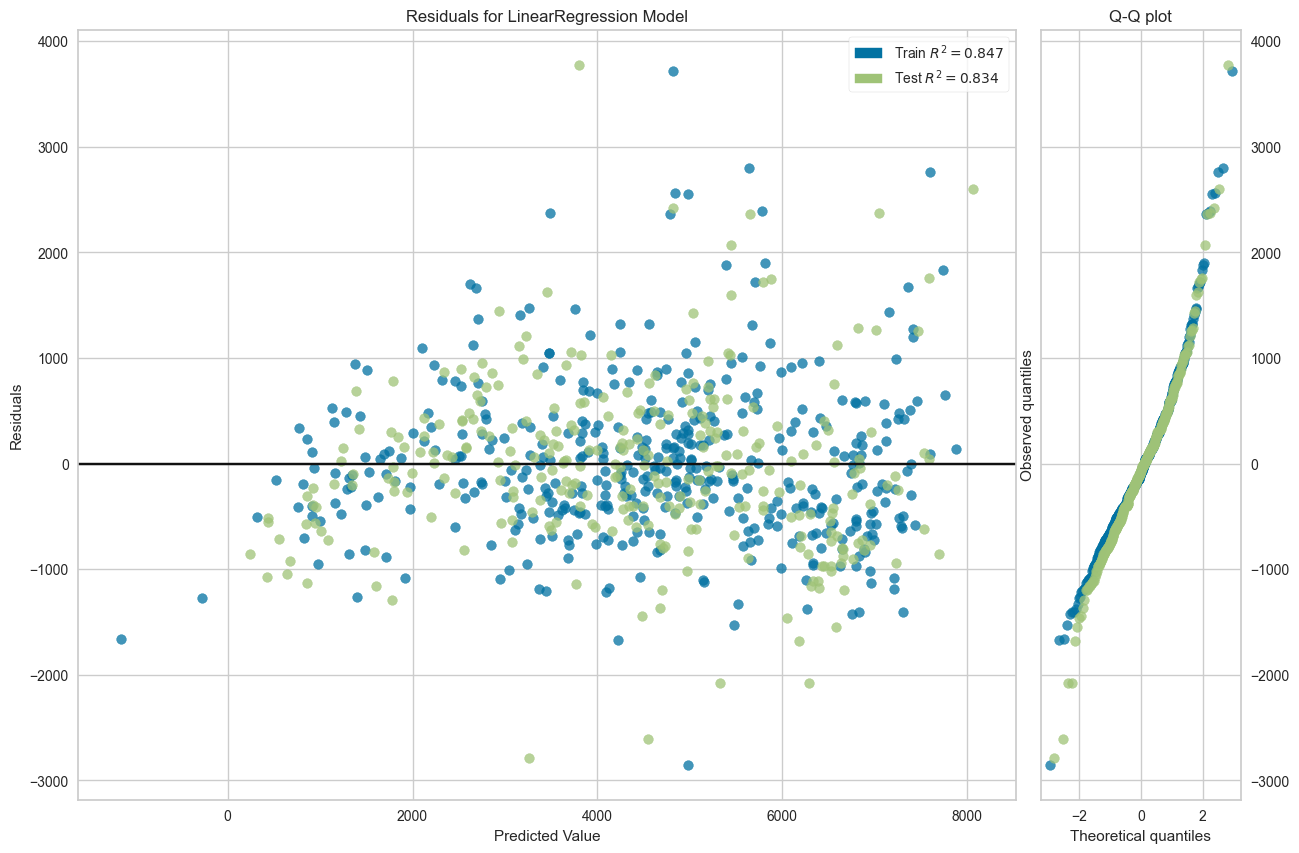

In [162]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(15,10));
viz = residuals_plot(lr, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

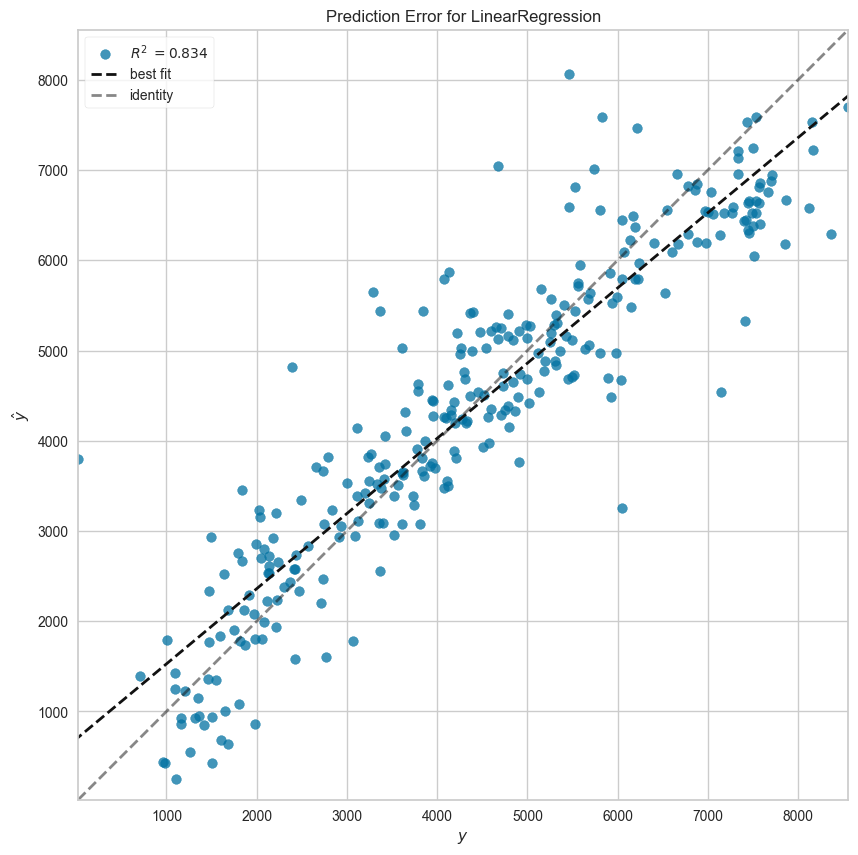

In [163]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(15,10))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

##### Métricas:

In [164]:
N = X_train.shape[0]

#MSE
prediction = result.predict(sm.add_constant(X_train))
mean_square_error = np.sum((y_train - prediction)**2)/N
mean_square_error

560776.2419001699

In [165]:
#NMSE Normalized vemos que el NMSE no llega a 0, lo que nos haría decir que tenemos una predicción perfecta
norm_mse_sk = 1-r2_score(y_train,prediction)
norm_mse_sk

0.15278481763856988

In [166]:
# R^2 vemos que nuestro modelo de regresión lineal solo explica un ~84.72% de la variable objetivo
R_squared_sk = r2_score(y_train,prediction) 
R_squared_sk

0.8472151823614301

##### Aplicamos validación cruzada

In [167]:
cross_val_metrics = pd.DataFrame(columns=['MSE', 'norm_MSE', 'R2'])

kf = KFold(n_splits=10)
i=1
for train_index, test_index in kf.split(X_train):
    print('Split {}: \n\tTest Folds: [{}] \n\tTrain Folds {}'.format(i, i, [j for j in range(1,11) if j != i]));
    
    x_train_fold = X_train.values[train_index]
    y_train_fold = y_train.values[train_index]
    x_test_fold = X_train.values[test_index,:]
    y_test_fold = y_train.values[test_index]
    
    lr = LinearRegression().fit(x_train_fold,y_train_fold)
    y_pred_fold = lr.predict(x_test_fold)
    fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
    fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
    fold_r2 = r2_score(y_test_fold, y_pred_fold)
    print(f'\tMSE: {fold_mse:3.3f} NMSE: {fold_nmse:3.3f} R2: {fold_r2:3.3f}')

    cross_val_metrics.loc[f'Fold {i}', :] = [fold_mse,fold_nmse, fold_r2]
    i+=1

Split 1: 
	Test Folds: [1] 
	Train Folds [2, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 634421.432 NMSE: 0.198 R2: 0.802
Split 2: 
	Test Folds: [2] 
	Train Folds [1, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 582390.795 NMSE: 0.157 R2: 0.843
Split 3: 
	Test Folds: [3] 
	Train Folds [1, 2, 4, 5, 6, 7, 8, 9, 10]
	MSE: 796269.409 NMSE: 0.194 R2: 0.806
Split 4: 
	Test Folds: [4] 
	Train Folds [1, 2, 3, 5, 6, 7, 8, 9, 10]
	MSE: 904457.682 NMSE: 0.213 R2: 0.787
Split 5: 
	Test Folds: [5] 
	Train Folds [1, 2, 3, 4, 6, 7, 8, 9, 10]
	MSE: 693003.636 NMSE: 0.185 R2: 0.815
Split 6: 
	Test Folds: [6] 
	Train Folds [1, 2, 3, 4, 5, 7, 8, 9, 10]
	MSE: 748262.841 NMSE: 0.334 R2: 0.666
Split 7: 
	Test Folds: [7] 
	Train Folds [1, 2, 3, 4, 5, 6, 8, 9, 10]
	MSE: 903585.705 NMSE: 0.244 R2: 0.756
Split 8: 
	Test Folds: [8] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 9, 10]
	MSE: 616374.864 NMSE: 0.154 R2: 0.846
Split 9: 
	Test Folds: [9] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 8, 10]
	MSE: 535670.814 NMSE: 0.161 R2: 0.839
Split 10: 
	Test Fo

In [168]:
cross_val_metrics.loc['Mean',:] = cross_val_metrics.mean()
cross_val_metrics

,MSE,norm_MSE,R2
Fold 1,634421.431818,0.198473,0.801527
Fold 2,582390.795455,0.156706,0.843294
Fold 3,796269.409091,0.193836,0.806164
Fold 4,904457.681818,0.213189,0.786811
Fold 5,693003.636364,0.18538,0.81462
Fold 6,748262.840909,0.334349,0.665651
Fold 7,903585.704545,0.243823,0.756177
Fold 8,616374.863636,0.15387,0.84613
Fold 9,535670.813953,0.161129,0.838871
Fold 10,445845.162791,0.127815,0.872185


In [169]:
lr = LinearRegression().fit(X_train,y_train);
folds_r2 = cross_val_score(lr, X_train,y_train, cv=10, scoring='r2')
lr_r2 = np.mean(folds_r2) 
folds_r2, lr_r2

(array([0.79845026, 0.84412913, 0.83522893, 0.78462347, 0.81666062,
        0.66221431, 0.75546904, 0.85801163, 0.83496603, 0.86853545]),
 0.8058288867594333)

In [170]:
weights = pd.DataFrame({'lr':lr.coef_},index=X_train.columns)
weights.T

,temp,atemp,hum,windspeed,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
lr,16.794057,4233.062239,-1146.074646,-761.202221,2.076108e+16,2.076108e+16,-3.033275e+15,-3.033275e+15,-3.033275e+15,-3.033275e+15,...,1.902809e+16,1.902809e+16,1.902809e+16,1.902809e+16,1.902809e+16,1.902809e+16,1.902809e+16,-7.630036e+16,-7.630036e+16,-7.630036e+16


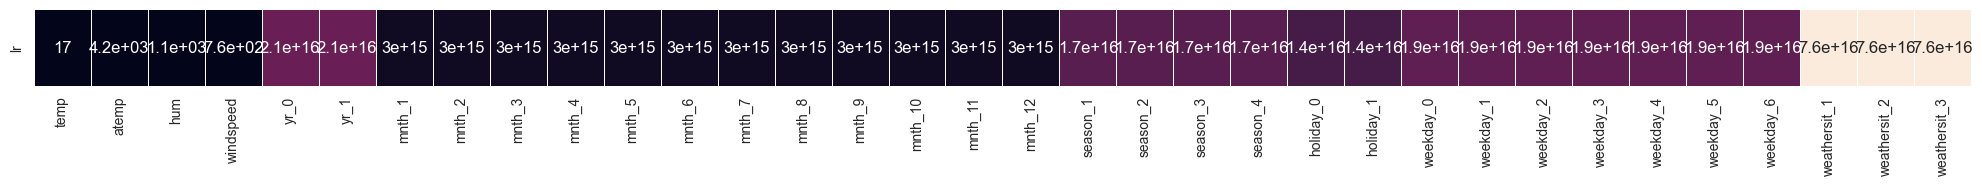

In [171]:
fig,  ax = plt.subplots( figsize = (25,1));
sns.heatmap(weights.T.loc[['lr'],:].abs(),annot=True, linewidths=.5,ax=ax,cbar=False,xticklabels=True);

In [172]:
r2_results = pd.DataFrame({'lr':lr_r2},index=['CV R2'])
valorLRr2 = lr_r2
r2_results.loc['Train R2', :] =[r2_score(y_train,lr.predict(X_train))]
r2_results.loc['lambda','lr']=0
r2_results

,lr
CV R2,0.805829
Train R2,0.846842
lambda,0.000000


#### RESULTADOS

In [173]:
r2_results2 = pd.DataFrame({'lr':lr_r2,'poison_cv':poison_cv.score(X_test,y_test)},index=['CV R2'])
r2_results2.loc['Train R2', :] = [r2_score(y_train,lr.predict(X_train)),
                                  r2_score(y_train,poison_cv.predict(X_train))]

r2_results2.loc['lambda','lr']=0
r2_results2.loc['lambda','poison_cv']= poison_cv.alpha
r2_results2

,lr,poison_cv
CV R2,0.805829,0.824082
Train R2,0.846842,0.826671
lambda,0.000000,45.000000


Podemos ver que segun las métricas, el modelo que ajusta mejor los datos es el **modelo de Poison** con una alpha de 45 utilizada con el conjunto de datos estandarizados con variables categóricas, y con una $R^{2}$ tanto para el conjunto de entrenamineto como validación cruzada muy aceptables. Aún así, podemos ver que a la hora de generalizar el modelo, el que funciona mejor es el modelo de **regresión lineal**. Este nos da una $R^{2}$ ligeramente mejor que la obtenida con Poison. Concretamente, 0.835 con 0.824 de Poison. 

Como podemos ver el modelo de regresión lineal sobreajusta ligeramente los datos, pero no de forma muy significativa.

Recordamos los gráficos dónde se observa:

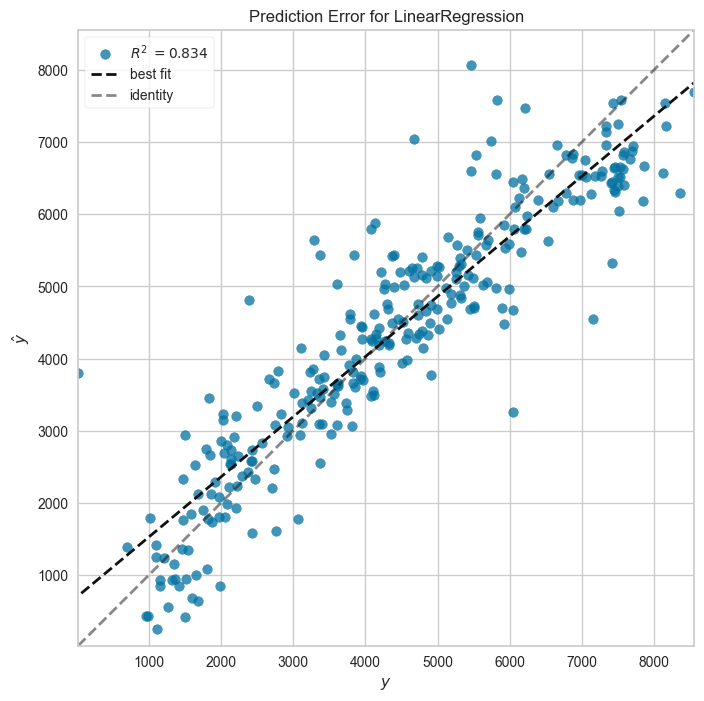

In [174]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

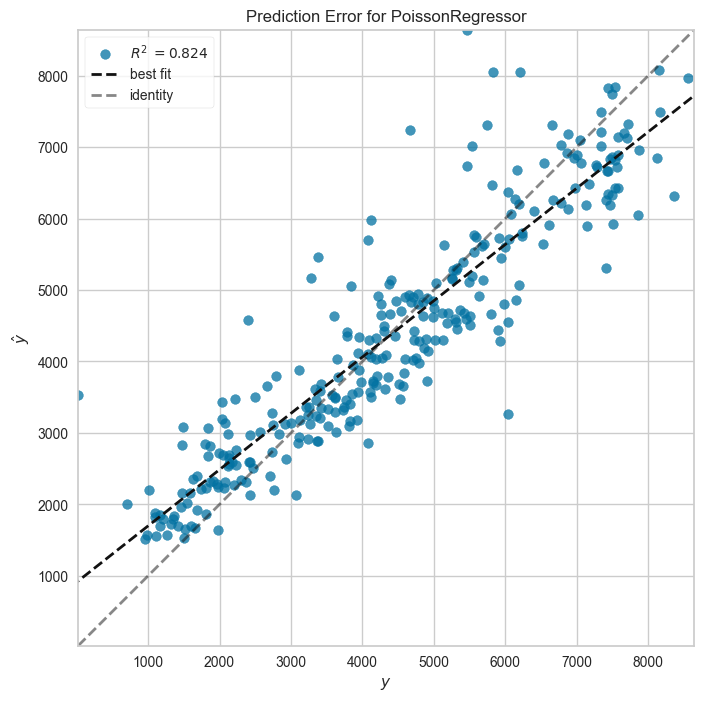

In [175]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(poison_cv, X_test, y_test, is_fitted=True)

#### e) Cuando se trata de entender un problema, es útil reducir el número de atributos en el modelo. Ajustad una regresión LASSO (ajustando la regularización usando la versión CV del modelo) y calculad la $\textit{calidad}$ del modelo con los datos de test.

In [202]:
alphas_lasso = [0.1, 0.5,1,5,10,40,42,43,45,46,47,48,49,50,53,54,60,70,80,100,1000,10000]
lasso_cv = LassoCV(alphas=alphas_lasso,cv=5,max_iter=100000).fit(X_train,y_train)
lasso_r2 = np.mean(cross_val_score(lasso_cv, X_train,y_train))

print('Best lambda:', lasso_cv.alpha_, 'R2 score:',lasso_r2)

Best lambda: 1.0 R2 score: 0.8134036009293262


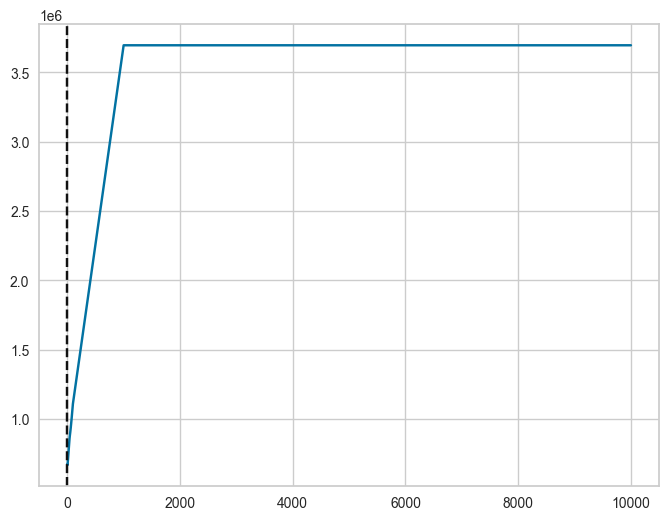

In [203]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(LassoCV(alphas=alphas_lasso));
vis.fit(X_train, y_train);

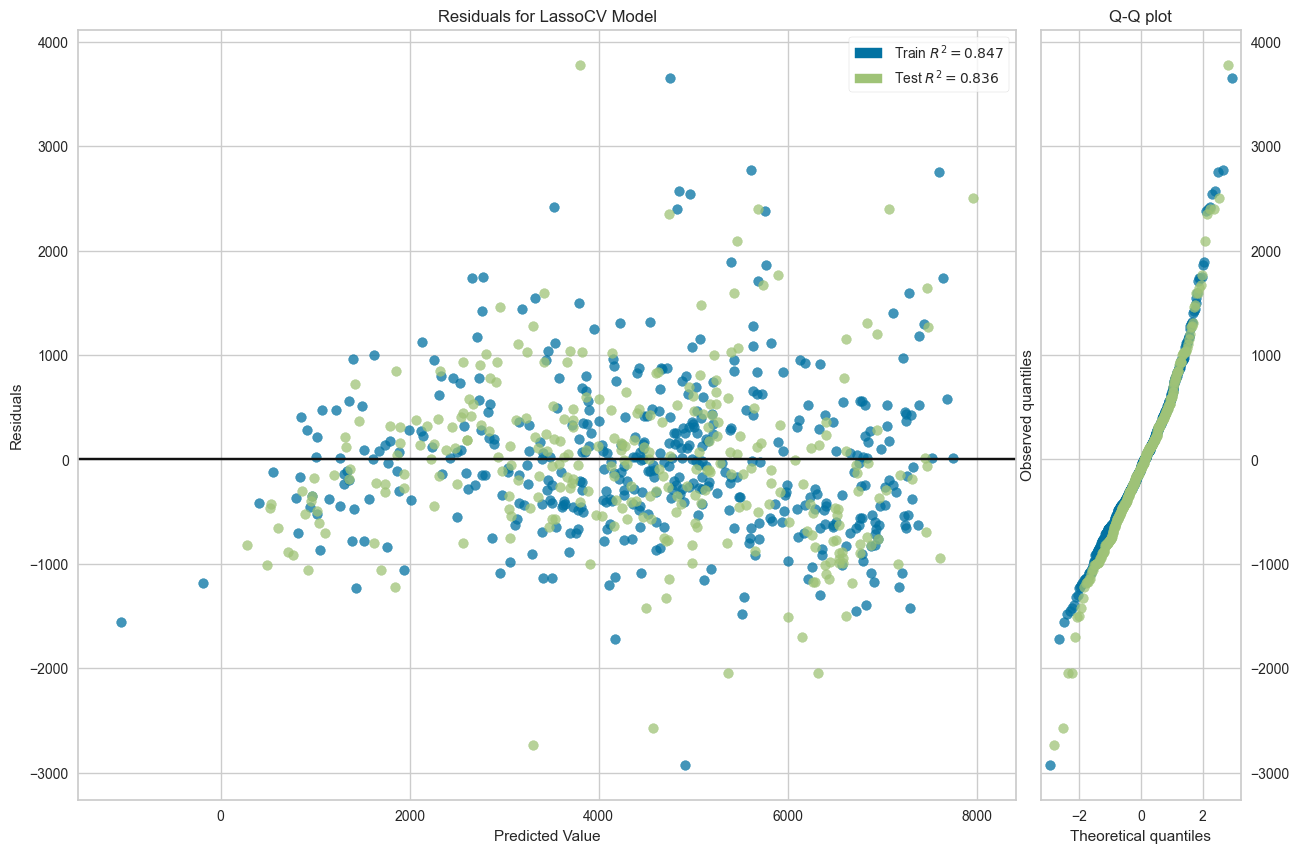

In [204]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(15,10));
viz = residuals_plot(lasso_cv, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

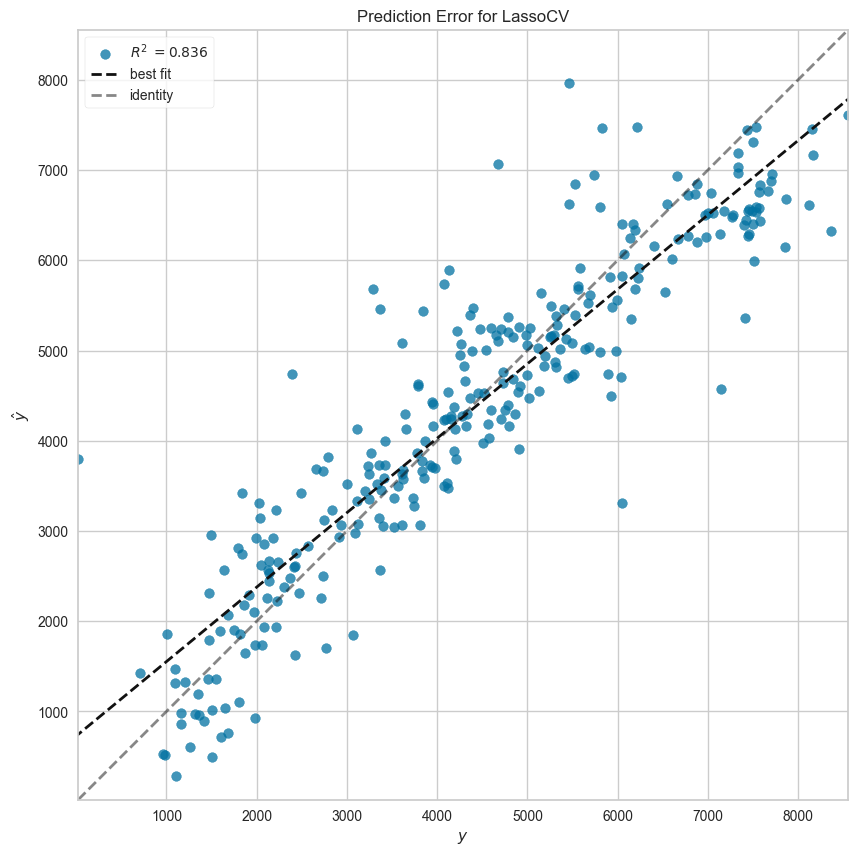

In [179]:
#calculamos el error de predicción del modelo
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(15,10))
visualizer = prediction_error(lasso_cv, X_test, y_test, is_fitted=True)

In [180]:
weights = pd.DataFrame({'lasso_cv':lasso_cv.coef_},index=X_train.columns)
weights.T

,temp,atemp,hum,windspeed,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
lasso_cv,116.970368,4137.353193,-1267.849217,-796.442193,-1958.150697,0.0,-173.050259,-0.0,328.524828,55.161567,...,-281.595025,-108.737339,-33.898869,36.640689,0.0,117.409503,125.759069,583.369394,-0.0,-1246.040998


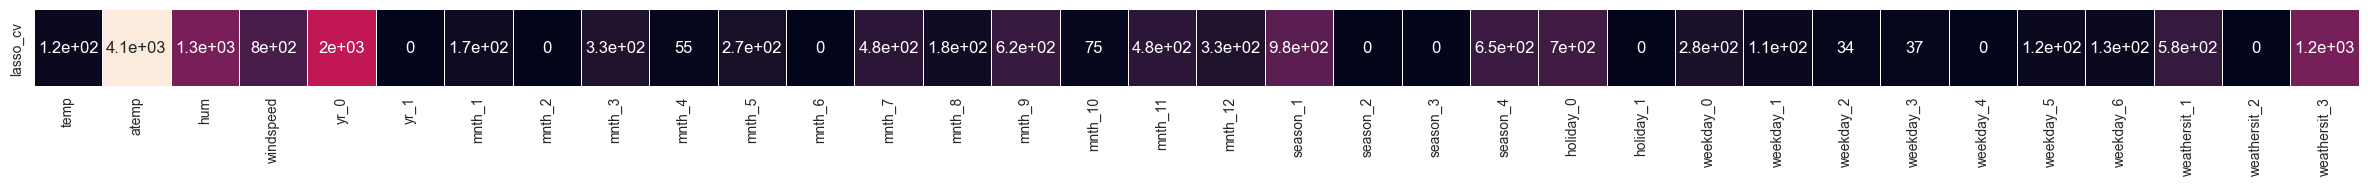

In [181]:
plt.figure(figsize = (30,1));
sns.heatmap(weights.T.loc[['lasso_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True);

In [182]:
r2_results3 = pd.DataFrame({'lasso_cv':lasso_r2},index=['CV R2'])

r2_results3.loc['Train R2', :] =[r2_score(y_train,lasso_cv.predict(X_train))]
r2_results3.loc['lambda','lasso_cv']=lasso_cv.alpha_
r2_results3

,lasso_cv
CV R2,0.813404
Train R2,0.846999
lambda,1.000000


##### RESULTADOS

In [183]:
r2_results2 = pd.DataFrame({'lr':lr_r2,'poison_cv':poison_cv.score(X_test,y_test),'lasso_cv':lasso_r2},index=['CV R2'])
r2_results2.loc['Train R2', :] = [r2_score(y_train,lr.predict(X_train)),
                                  r2_score(y_train,poison_cv.predict(X_train)),
                                  r2_score(y_train,lasso_cv.predict(X_train))]

r2_results2.loc['lambda','lr']= 0
r2_results2.loc['lambda','poison_cv']= poison_cv.alpha
r2_results2.loc['lambda','lasso_cv']= lasso_cv.alpha_
r2_results2

,lr,poison_cv,lasso_cv
CV R2,0.805829,0.824082,0.813404
Train R2,0.846842,0.826671,0.846999
lambda,0.000000,45.000000,1.000000


#### f) Ahora podemos analizar y comparar los resultados:

* Comparad los valores pronosticados con los valores reales de los tres modelos y sus calidades. ¿Qué modelo os parece mejor? ¿Por qué?

##### REGRESION LINEAL

* Analizad los pesos de la regresión lineal y LASSO. ¿Qué atributos son más importantes? ¿Hay atributos que no son relevantes?

In [184]:
r2_results2 = pd.DataFrame({'lr':lr_r2,'lasso_cv':lasso_r2},index=['CV R2'])
r2_results2.loc['Train R2', :] = [r2_score(y_train,lr.predict(X_train)),
                                  r2_score(y_train,lasso_cv.predict(X_train))]

r2_results2.loc['lambda','lr']= 0
r2_results2.loc['lambda','lasso_cv']= lasso_cv.alpha_
r2_results2

weights = pd.DataFrame({'lr':lr.coef_, 'lasso_cv':lasso_cv.coef_},index=X_train.columns)
weights.T

,temp,atemp,hum,windspeed,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
lr,16.794057,4233.062239,-1146.074646,-761.202221,2.076108e+16,2.076108e+16,-3.033275e+15,-3.033275e+15,-3.033275e+15,-3.033275e+15,...,1.902809e+16,1.902809e+16,1.902809e+16,1.902809e+16,1.902809e+16,1.902809e+16,1.902809e+16,-7.630036e+16,-7.630036e+16,-7.630036e+16
lasso_cv,116.970368,4137.353193,-1267.849217,-796.442193,-1.958151e+03,0.000000e+00,-1.730503e+02,-0.000000e+00,3.285248e+02,5.516157e+01,...,-2.815950e+02,-1.087373e+02,-3.389887e+01,3.664069e+01,0.000000e+00,1.174095e+02,1.257591e+02,5.833694e+02,-0.000000e+00,-1.246041e+03


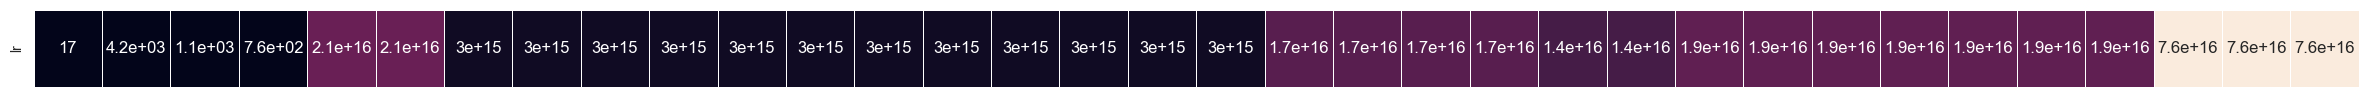

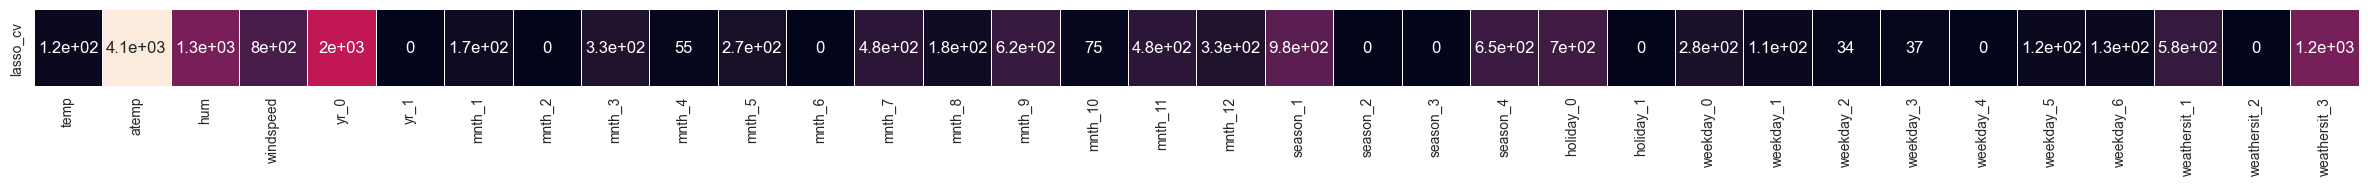

In [185]:
plt.figure(figsize = (30,1));
sns.heatmap(weights.T.loc[['lr'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False);

plt.figure(figsize = (30,1));
sns.heatmap(weights.T.loc[['lasso_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True);

Nos encontramos con que la regresión lineal utiliza pesos elevados, que no se aproximen a 0, y que en general parece que se encuentran distribuidos entre todas las variables. Sin emvargo si que nos encontramos con dos valores que parecen tener mas correlación, que son yr_0 y yr_1

En Lasso sin embargo podemos ver algunos valores que directamente son 0, y otros que son mucho mas elevados, eso es debido a que Lasso elimina esas variables que cree que no necesitamos, a diferencia de linear regression, y nos encontramos con atributos varios atributos que si que tienen correlación. En concreto, atemp, hum, Yr_0 y weathersit_3 parecen tener mas correlación que las otras. 

Por lo tanto, aunque parece que los modelos nos dan calidades parecidas en realidad podemos ver que usan los atributos de forma muy diferente. Por un lado lasso decide que hay atributos que no son importantes, y decide centralizarse en esos, mientraas que la regresión lineal está tratando de equilibrar los rangos de las variables, por eso ningún valor llega a 0.

* Comparad las predicciones de la regresión de Poisson y la regresión de LASSO. ¿Hay alguna diferencia en su comportamiento? ¿Qué creéis que está pasando?

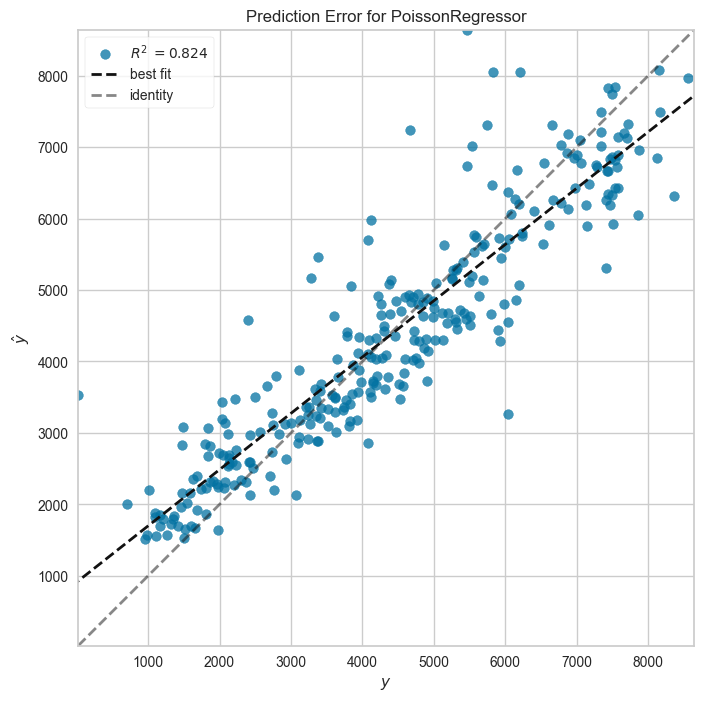

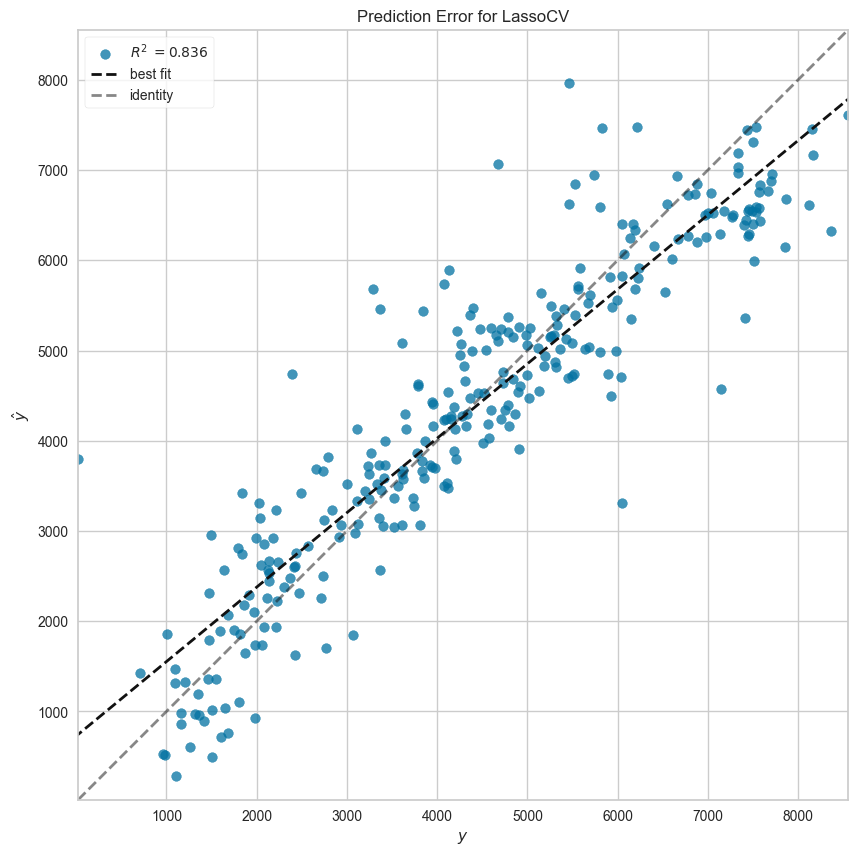

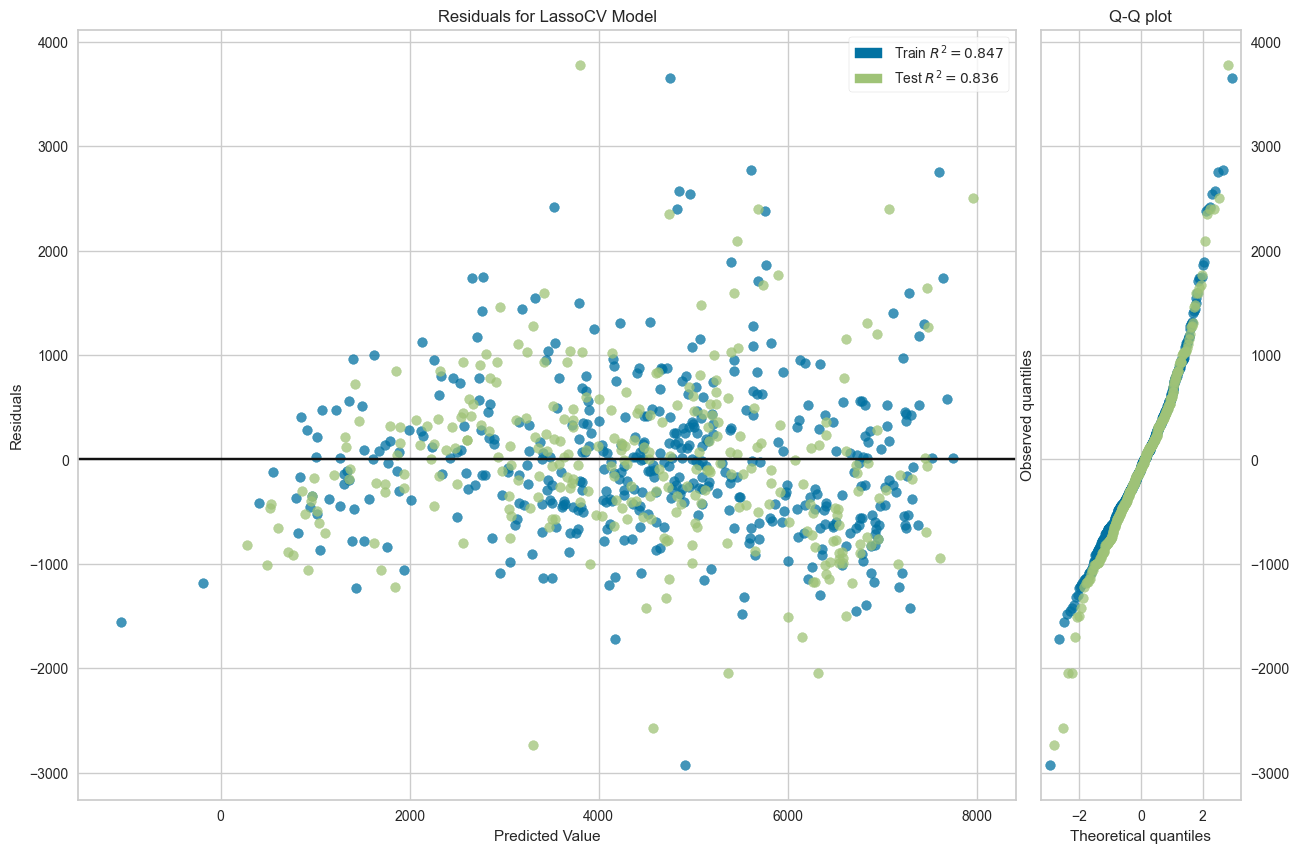

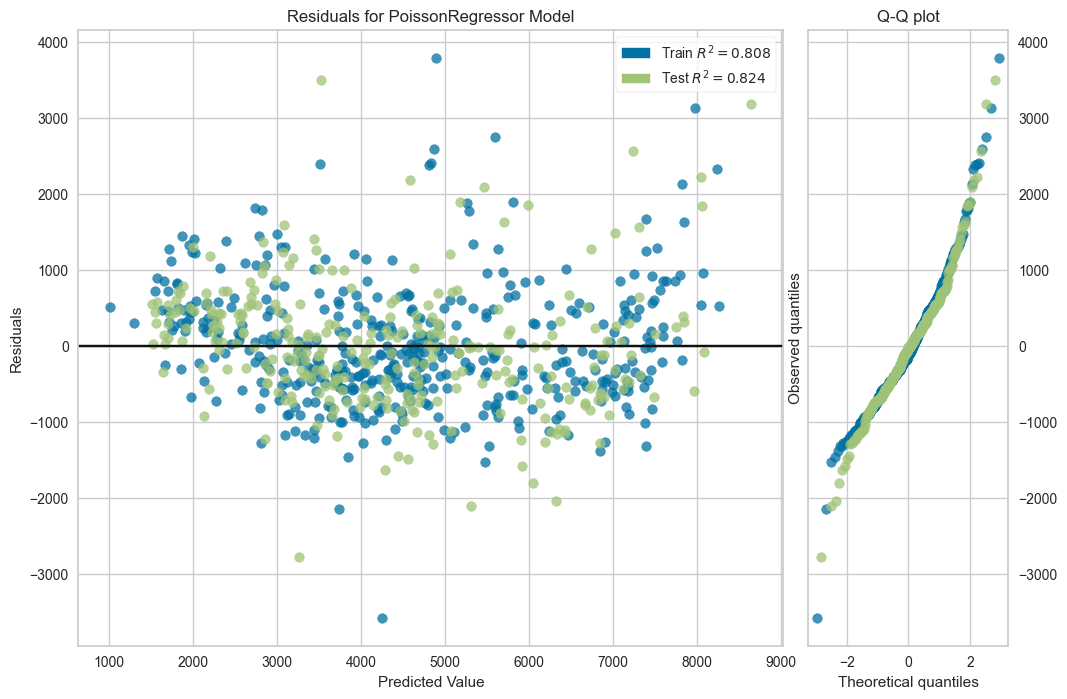

In [186]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8, 8))
visualizer = prediction_error(poison_cv, X_test, y_test, is_fitted=True)

#calculamos el error de predicción del modelo
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(15, 10))
visualizer = prediction_error(lasso_cv, X_test, y_test, is_fitted=True)
from yellowbrick.regressor import residuals_plot

plt.figure(figsize=(15, 10));
viz = residuals_plot(lasso_cv, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);
from yellowbrick.regressor import residuals_plot

plt.figure(figsize=(12, 8));
viz = residuals_plot(poison_cv, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

Como su nombre lo indica, la regresion de Poison asume una distribucion de datos siguiendo su distribución. Lasso utiliza la magnitud de los coeficientes, eliminando aquellos que tienen menor magnitud. Mientras que Poisson presenta una distribucion de probabilidades que comienza en cero en el valor cero y aumenta conforme su parametro labmda. Para nuestro caso parecia adecuado pensar que nuestro valores seguin la distribucion de Poisson, la variable 'cnt' son enteros extrictamente positivos. Sin embargo, tras obtener mejores resultados con RL de lasso podriamos concluir que los datos no se adaptan perfectamente a una distribucion de Poisson.

*nota1: despues de terminado el problema se ha identificado que las variables holiday y year solo pueden adoptar dos valores. Por este motivo el onehotcodung se hace inecesario. Esto se ha comprovado ejecutando el codigo pero al tratarse este de un ejercicio academico, y al llegar al mismo resultado, se ha optado por dejar la version original y asi mostrar la curva de aprendizaje que conlleva el trabajo.

    